In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 1. 기본 정보 (Demographics & Metadata)

* **1) ID:** 환자 고유 식별 번호.
* **5) Age:** 환자의 나이 (**일(days) 단위**).
* *분석 팁: 보통 `Age / 365.25`를 계산해서 '년(year)' 단위로 바꿔서 사용합니다.*


* **6) Sex:** 성별.
* `M`: 남성 (Male)
* `F`: 여성 (Female)



### 2. 환자 상태 및 이력 (Status & History)

* **2) N_Days:** 관찰 기간 (일수).
* 등록 시점부터 사망, 이식, 또는 연구 종료 시점(1986년 7월)까지의 기간.


* **3) Status:** 환자의 최종 상태.
* `C`: 중도 절단 (Censored) - 연구 종료 시점까지 생존해 있었음.
* `CL`: 간 이식으로 인한 중도 절단 (Censored due to Liver tx) - 생존했지만 간 이식을 받음.
* `D`: 사망 (Death).


* **4) Drug:** 투여된 약물 종류.
* `D-penicillamine`: D-페니실라민 (치료제).
* `placebo`: 위약 (가짜 약).


* **20) Stage:** 질병의 진행 단계 (조직학적 단계).
* 1, 2, 3, 4기로 나뉩니다. (숫자가 클수록 중증)



### 3. 임상 증상 (Physical Symptoms)

주로 간 기능 저하로 인해 나타나는 증상들입니다.

* **7) Ascites:** 복수(배에 물이 차는 증상) 여부. (`N`: 없음, `Y`: 있음)
* **8) Hepatomegaly:** 간 비대증(간이 커짐) 여부. (`N`: 없음, `Y`: 있음)
* **9) Spiders:** 거미 혈관종(피부에 거미줄 모양의 붉은 반점) 여부. (`N`: 없음, `Y`: 있음)
* **10) Edema:** 부종(몸이 붓는 증상) 여부.
* `N`: 부종 없음 (이뇨제 치료 안 함).
* `S`: 부종이 있으나 이뇨제를 안 쓰거나, 이뇨제로 호전된 상태.
* `Y`: 이뇨제 치료에도 불구하고 부종이 남아있는 상태 (심각).



### 4. 혈액 검사 수치 (Lab Test Results)

* **11) Bilirubin:** 혈청 빌리루빈 수치 (mg/dl). *[간 기능의 핵심 지표]*
* **12) Cholesterol:** 혈청 콜레스테롤 수치 (mg/dl).
* **13) Albumin:** 알부민 수치 (gm/dl). *[간에서 생성되는 단백질, 낮으면 간 기능 저하]*
* **14) Copper:** 소변 내 구리 수치 (ug/day).
* **15) Alk_Phos:** 알칼리성 인산분해효소 수치 (U/liter).
* **16) SGOT:** AST라고도 불리는 간 효소 수치 (U/ml).
* **17) Triglycerides:** 중성지방 수치 (mg/dl).
* **18) Platelets:** 혈소판 수치 (ml/1000). *[간경변 시 수치가 낮아지는 경향이 있음]*
* **19) Prothrombin:** 프로트롬빈 시간 (초). *[혈액 응고 시간, 길어지면 간 기능 저하]*



In [2]:
df = pd.read_csv('cirrhosis.csv', index_col='ID',encoding='utf-8')
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,,,,,,,,,,,,,,,,,,,
1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 418 entries, 1 to 418
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    str    
 2   Drug           312 non-null    str    
 3   Age            418 non-null    int64  
 4   Sex            418 non-null    str    
 5   Ascites        312 non-null    str    
 6   Hepatomegaly   312 non-null    str    
 7   Spiders        312 non-null    str    
 8   Edema          418 non-null    str    
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    284 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         310 non-null    float64
 13  Alk_Phos       312 non-null    float64
 14  SGOT           312 non-null    float64
 15  Tryglicerides  282 non-null    float64
 16  Platelets      407 non-null    float64
 17  Prothrombin    416 non-null    float64
 18  Stage          412 no

In [4]:
df.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


## 결측치 처리

In [5]:
df.isna().sum()

N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [6]:
df.select_dtypes(include=(['int64', 'float64'])).isna().sum()

N_Days             0
Age                0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [7]:
df.select_dtypes(include=(['int64', 'float64'])).isna().sum()
df_num_col = df.select_dtypes(include=(['int64', 'float64'])).columns
for c in df_num_col:
    df[c]=df[c].fillna(df[c].median())

df.select_dtypes(include=(['int64', 'float64'])).isna().sum()

N_Days           0
Age              0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [8]:
# For Categorical type
df.select_dtypes(include=('object')).isna().sum()

Status            0
Drug            106
Sex               0
Ascites         106
Hepatomegaly    106
Spiders         106
Edema             0
dtype: int64

In [9]:
df_cat_col = df.select_dtypes(include=('object')).columns
for c in df_cat_col:
    # 이렇게 바꿔야 원본 df에 값이 저장됩니다.
    df[c] = df[c].fillna(df[c].mode().values[0])
    
df.select_dtypes(include=('object')).isna().sum()

Status          0
Drug            0
Sex             0
Ascites         0
Hepatomegaly    0
Spiders         0
Edema           0
dtype: int64

#################################

# EDA

In [10]:
df['Stage'].value_counts()

Stage
3.0    161
4.0    144
2.0     92
1.0     21
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of Example Per Class')

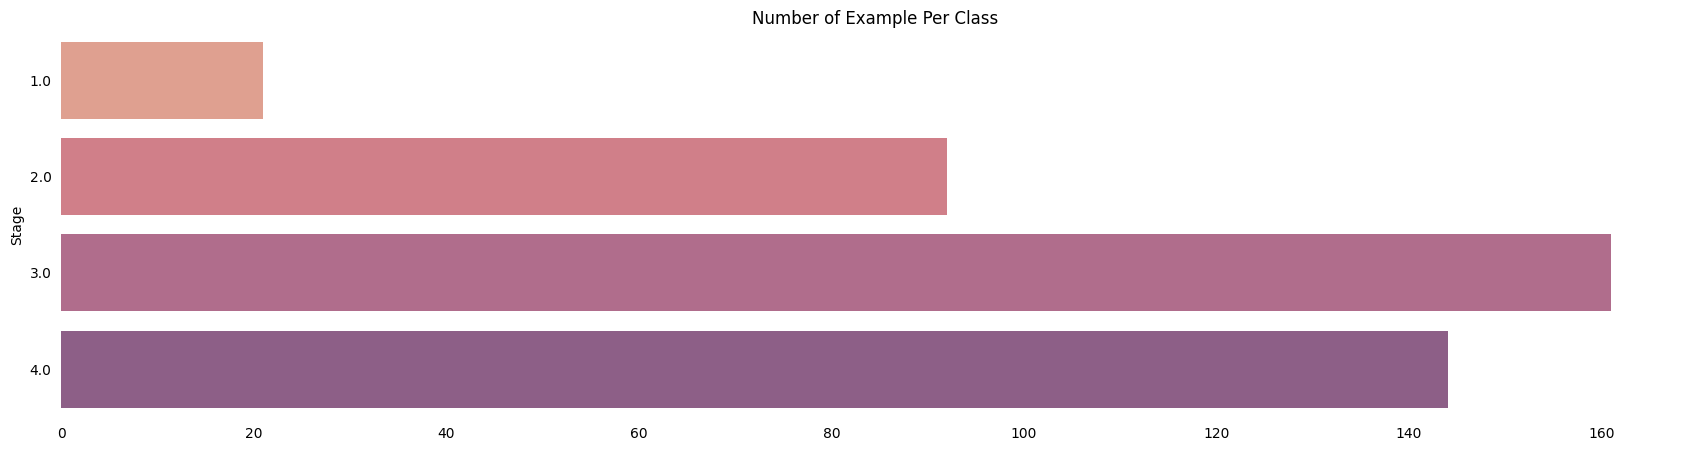

In [11]:
plt.figure(figsize=(21,5))
sns.countplot(y=df['Stage'], palette="flare", alpha=0.8, )
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Number of Example Per Class')

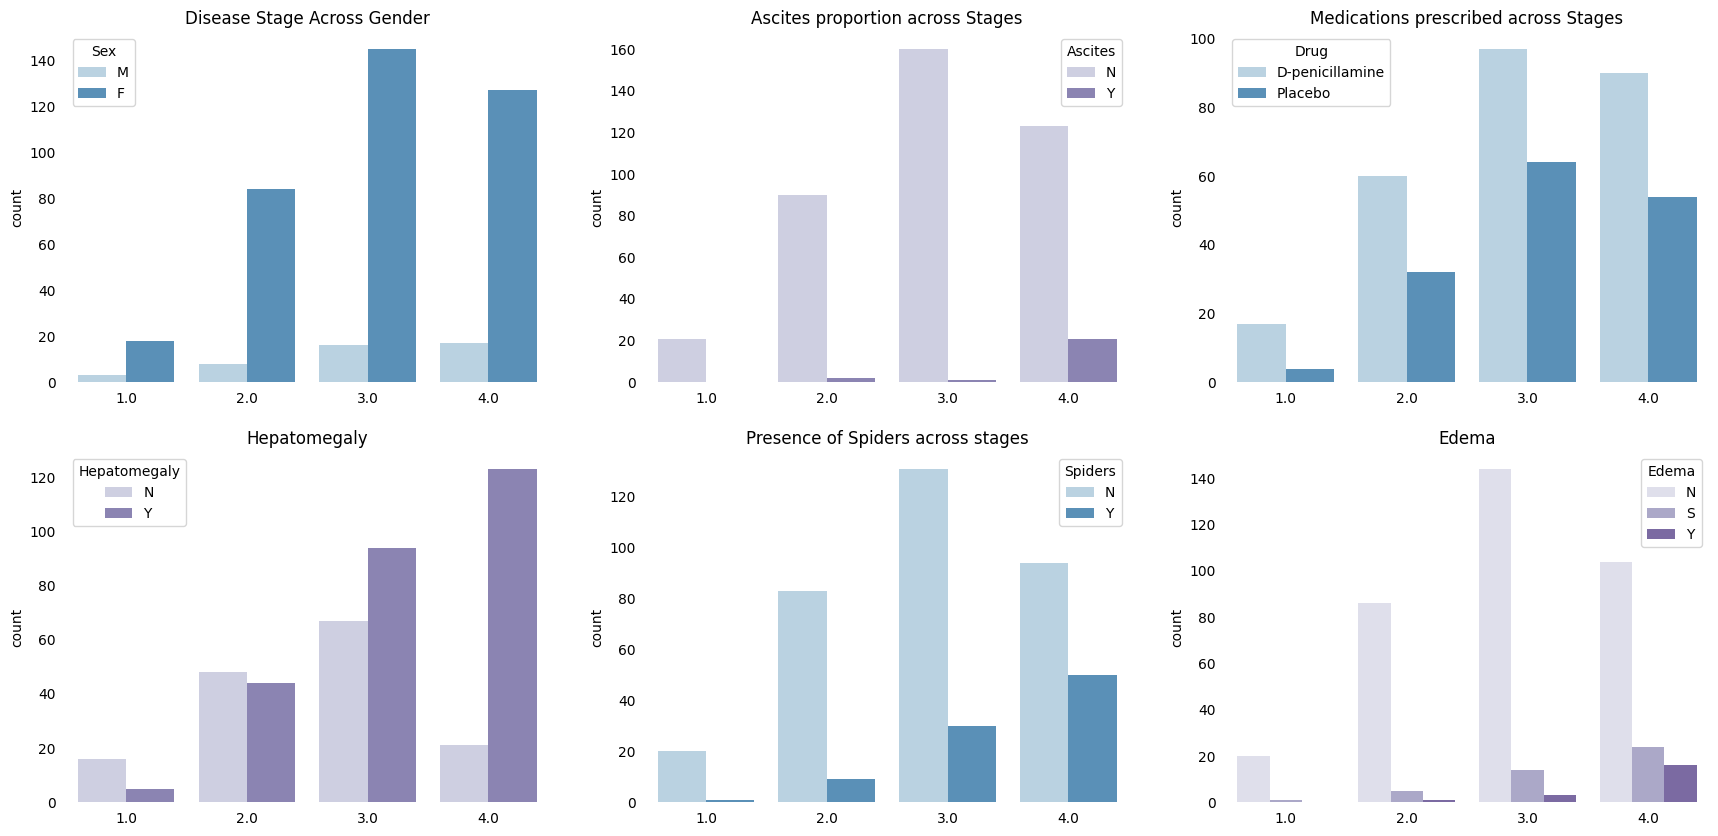

In [12]:
plt.figure(figsize=(21.2,10))

plt.subplot(2,3,1)
sns.countplot(x=df['Stage'], hue=df['Sex'], palette='Blues', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Disease Stage Across Gender')

plt.subplot(2,3,2)
sns.countplot(x=df['Stage'], hue=df['Ascites'], palette='Purples', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Ascites proportion across Stages')

plt.subplot(2,3,3)
sns.countplot(x=df['Stage'], hue=df['Drug'], palette='Blues', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Medications prescribed across Stages');

plt.subplot(2,3,4)
sns.countplot(x=df['Stage'], hue=df['Hepatomegaly'], palette='Purples', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Hepatomegaly');

plt.subplot(2,3,5)
sns.countplot(x=df['Stage'], hue=df['Spiders'], palette='Blues', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Presence of Spiders across stages');

plt.subplot(2,3,6)
sns.countplot(x=df['Stage'], hue=df['Edema'], palette='Purples', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Edema');

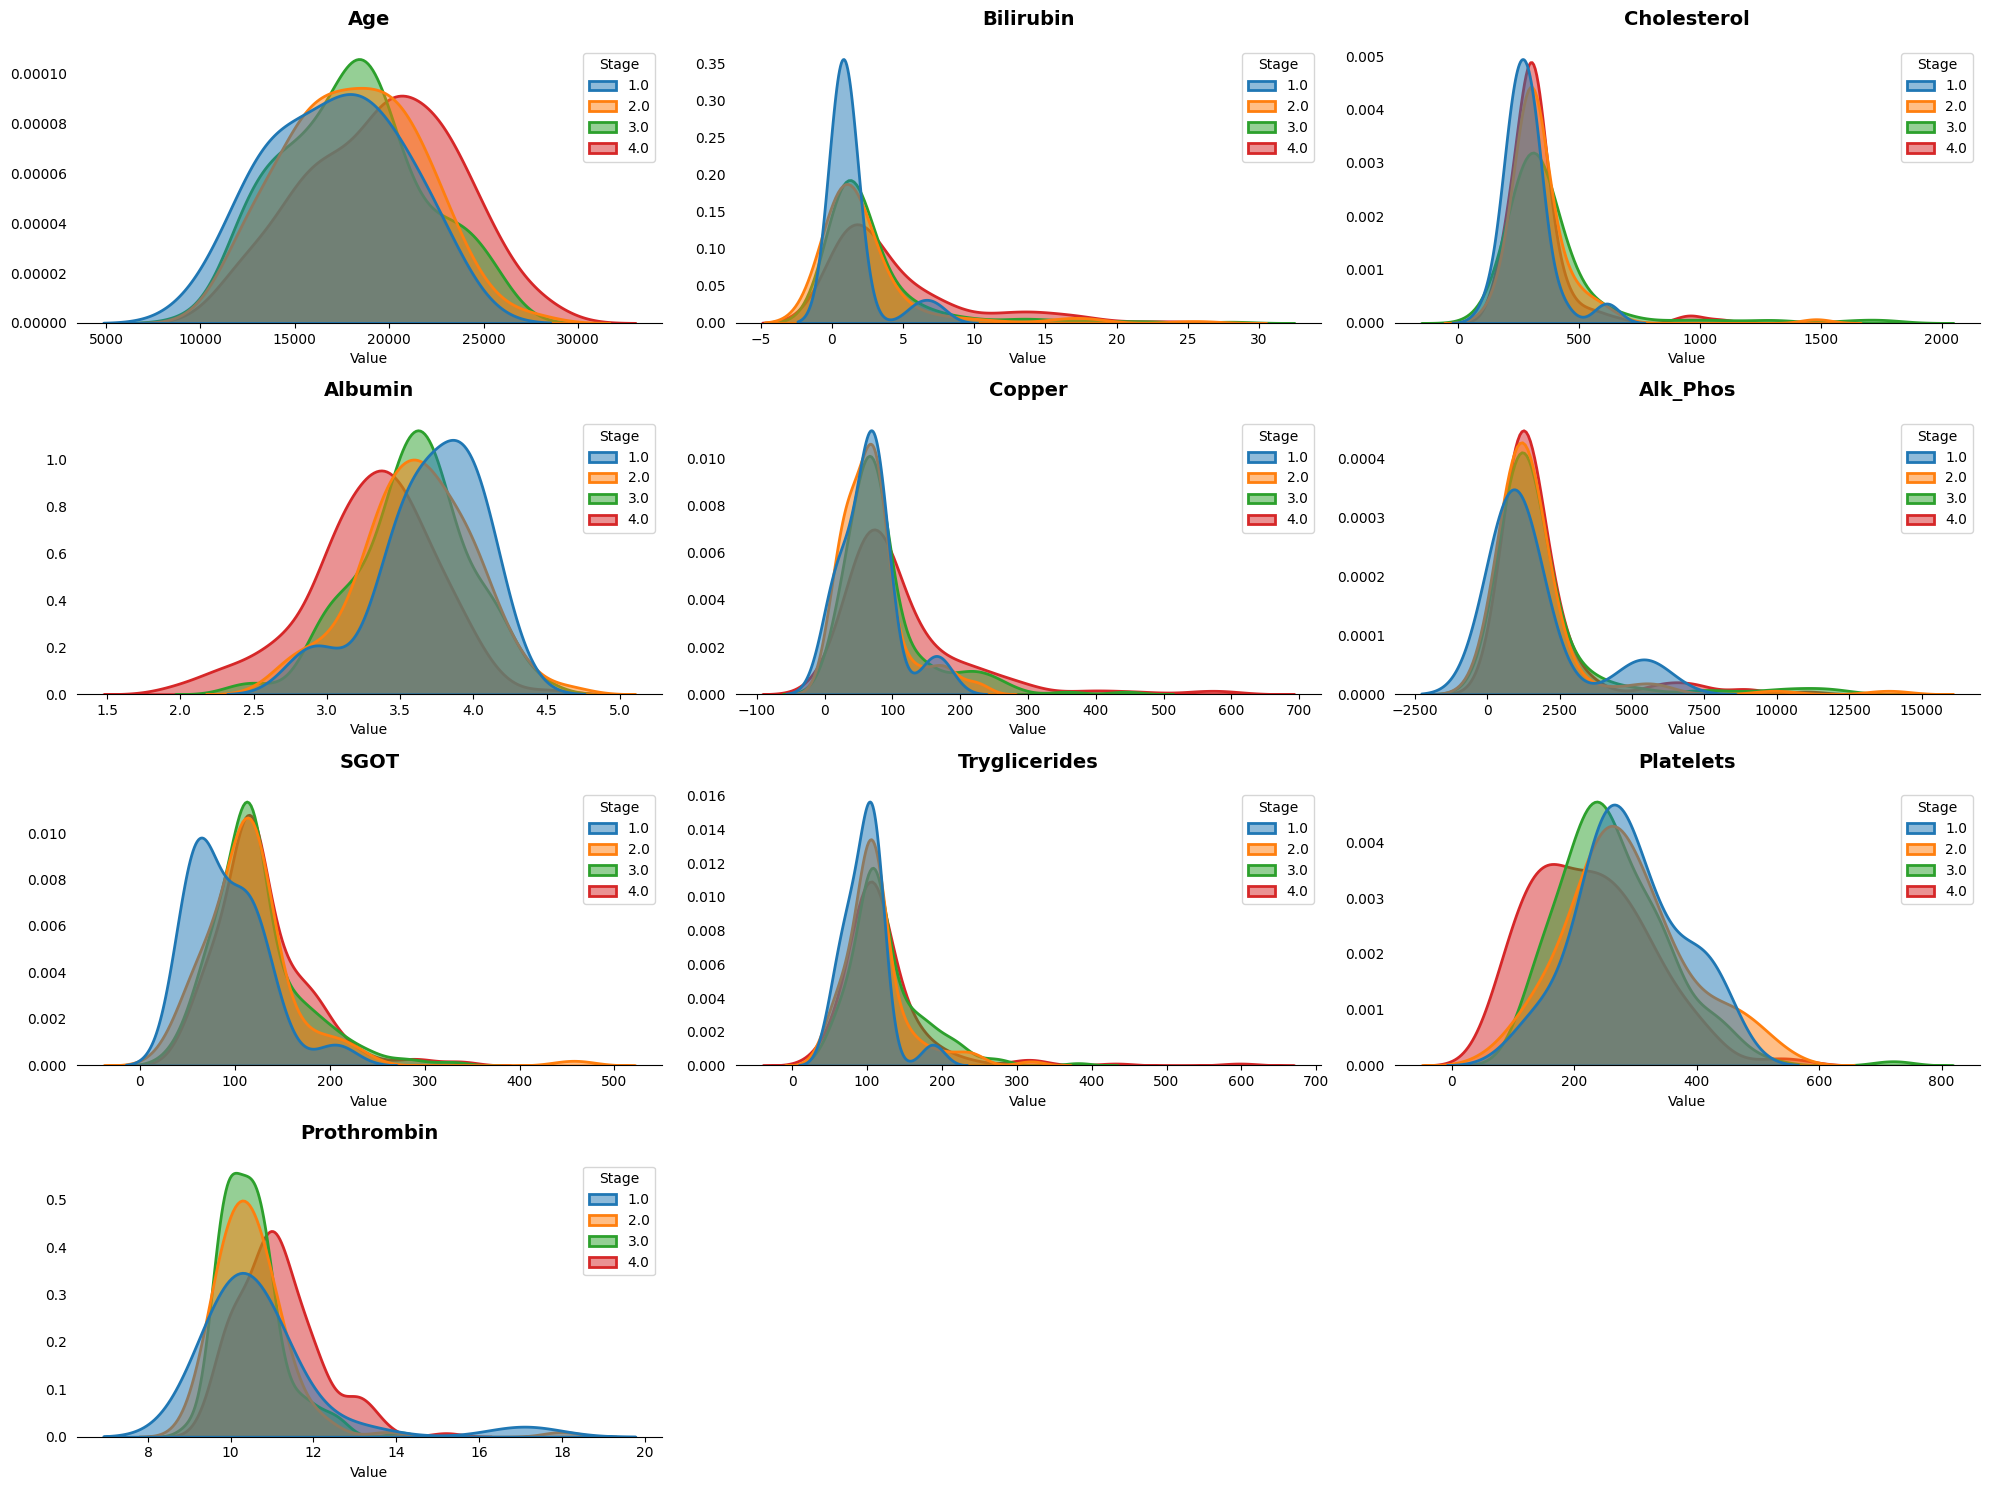

In [13]:
# 1. 데이터를 long-form으로 변환 (기존과 동일)
target_vars =['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 
                  'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

# 실제 컬럼명과 일치하는지 확인하며 melt 수행
# (만약 df에 없는 컬럼이 리스트에 있으면 에러가 나므로 intersection 사용)
valid_vars = [v for v in target_vars if v in df.columns]
df_long = pd.melt(df, id_vars=['Stage'], value_vars=valid_vars, 
                  var_name='Variable', value_name='Value')

# 2. 그래프 그리기
plt.figure(figsize=(20, 15))

# Stage별로 확실하게 구분되는 색상 팔레트 지정
# 방법 A: 알록달록하게 구분 (명확도 최고)
custom_palette = "tab10" 
# 방법 B: 심각도 표현 (노랑 -> 주황 -> 빨강 -> 검정)
# custom_palette = ["#FFEDA0", "#FEB24C", "#F03B20", "#BD0026"] 

for i, variable in enumerate(valid_vars, 1):
    plt.subplot(4, 3, i)
    
    # 해당 변수 데이터만 필터링
    variable_data = df_long[df_long['Variable'] == variable]
    
    sns.kdeplot(
        data=variable_data,
        x='Value', 
        hue='Stage', 
        fill=True, 
        alpha=0.5,         # 투명도를 주어 겹치는 부분도 보이게 함
        palette=custom_palette, # 대비가 확실한 색상 사용
        common_norm=False, # [중요] 각 Stage별로 면적을 별도로 계산 (비율 왜곡 방지)
        linewidth=2        # 테두리 선을 굵게 하여 구분감 향상
    )
    
    # 스타일 정리
    sns.despine(top=True, right=True, left=True)
    plt.tick_params(left=False) # Y축 눈금 제거
    plt.ylabel('')              # Y축 라벨 제거 (깔끔하게)
    plt.title(f'{variable}', fontsize=14, fontweight='bold', pad=15)

plt.tight_layout()
plt.show()

In [14]:
# 1. 보고 싶은 변수 리스트 정의
target_vars = ['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 
                  'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

# 실제 데이터프레임에 존재하는 컬럼만 선택 (에러 방지)
valid_vars = [v for v in target_vars if v in df.columns]

# 2. Stage별로 묶어서 중앙값(median), 평균(mean), 표준편차(std) 계산
# .T를 붙여서 행/열을 전환합니다 (Stage가 컬럼으로 오게 됨)
stat_df = df.groupby('Stage')[valid_vars].agg(['median', 'mean', 'std']).T

# 3. 보기 좋게 소수점 둘째 자리에서 반올림하여 출력
pd.options.display.float_format = '{:.2f}'.format
display(stat_df)

Stage                    1.00     2.00     3.00     4.00
Age           median 16929.00 17897.00 18102.00 19724.00
              mean   17108.71 18067.43 17997.52 19637.88
              std     3486.56  3515.28  3695.34  3953.22
Bilirubin     median     0.80     0.95     1.30     2.55
              mean       1.36     2.45     2.82     4.43
              std        1.79     4.14     4.14     4.86
Cholesterol   median   256.00   309.50   309.50   309.50
              mean     283.71   338.46   385.47   328.18
              std       95.82   152.12   251.15   139.82
Albumin       median     3.77     3.62     3.61     3.34
              mean       3.71     3.61     3.58     3.30
              std        0.35     0.38     0.38     0.44
Copper        median    73.00    73.00    73.00    73.00
              mean      65.24    69.43    87.22   113.58
              std       41.02    45.52    65.22    94.55
Alk_Phos      median  1003.00  1259.00  1259.00  1259.00
              mean    1590.59  1665.30  1872.51  1833.04
              std     1652.21  1841.87  2061.57  1712.34
SGOT          median    79.05   114.70   114.70   114.70
              mean      91.66   115.33   121.88   126.66
              std       39.47    53.42    47.60    47.72
Tryglicerides median   108.00   108.00   108.00   108.00
              mean      97.38   111.95   123.96   121.90
              std       28.26    44.31    49.40    65.51
Platelets     median   270.00   271.00   252.00   218.00
              mean     289.86   284.55   265.04   225.23
              std       83.38    98.36    90.59    96.98
Prothrombin   median    10.20    10.40    10.40    11.00
              mean      10.77    10.53    10.47    11.14
              std        1.64     1.08     0.76     0.99

## 이상치 분석


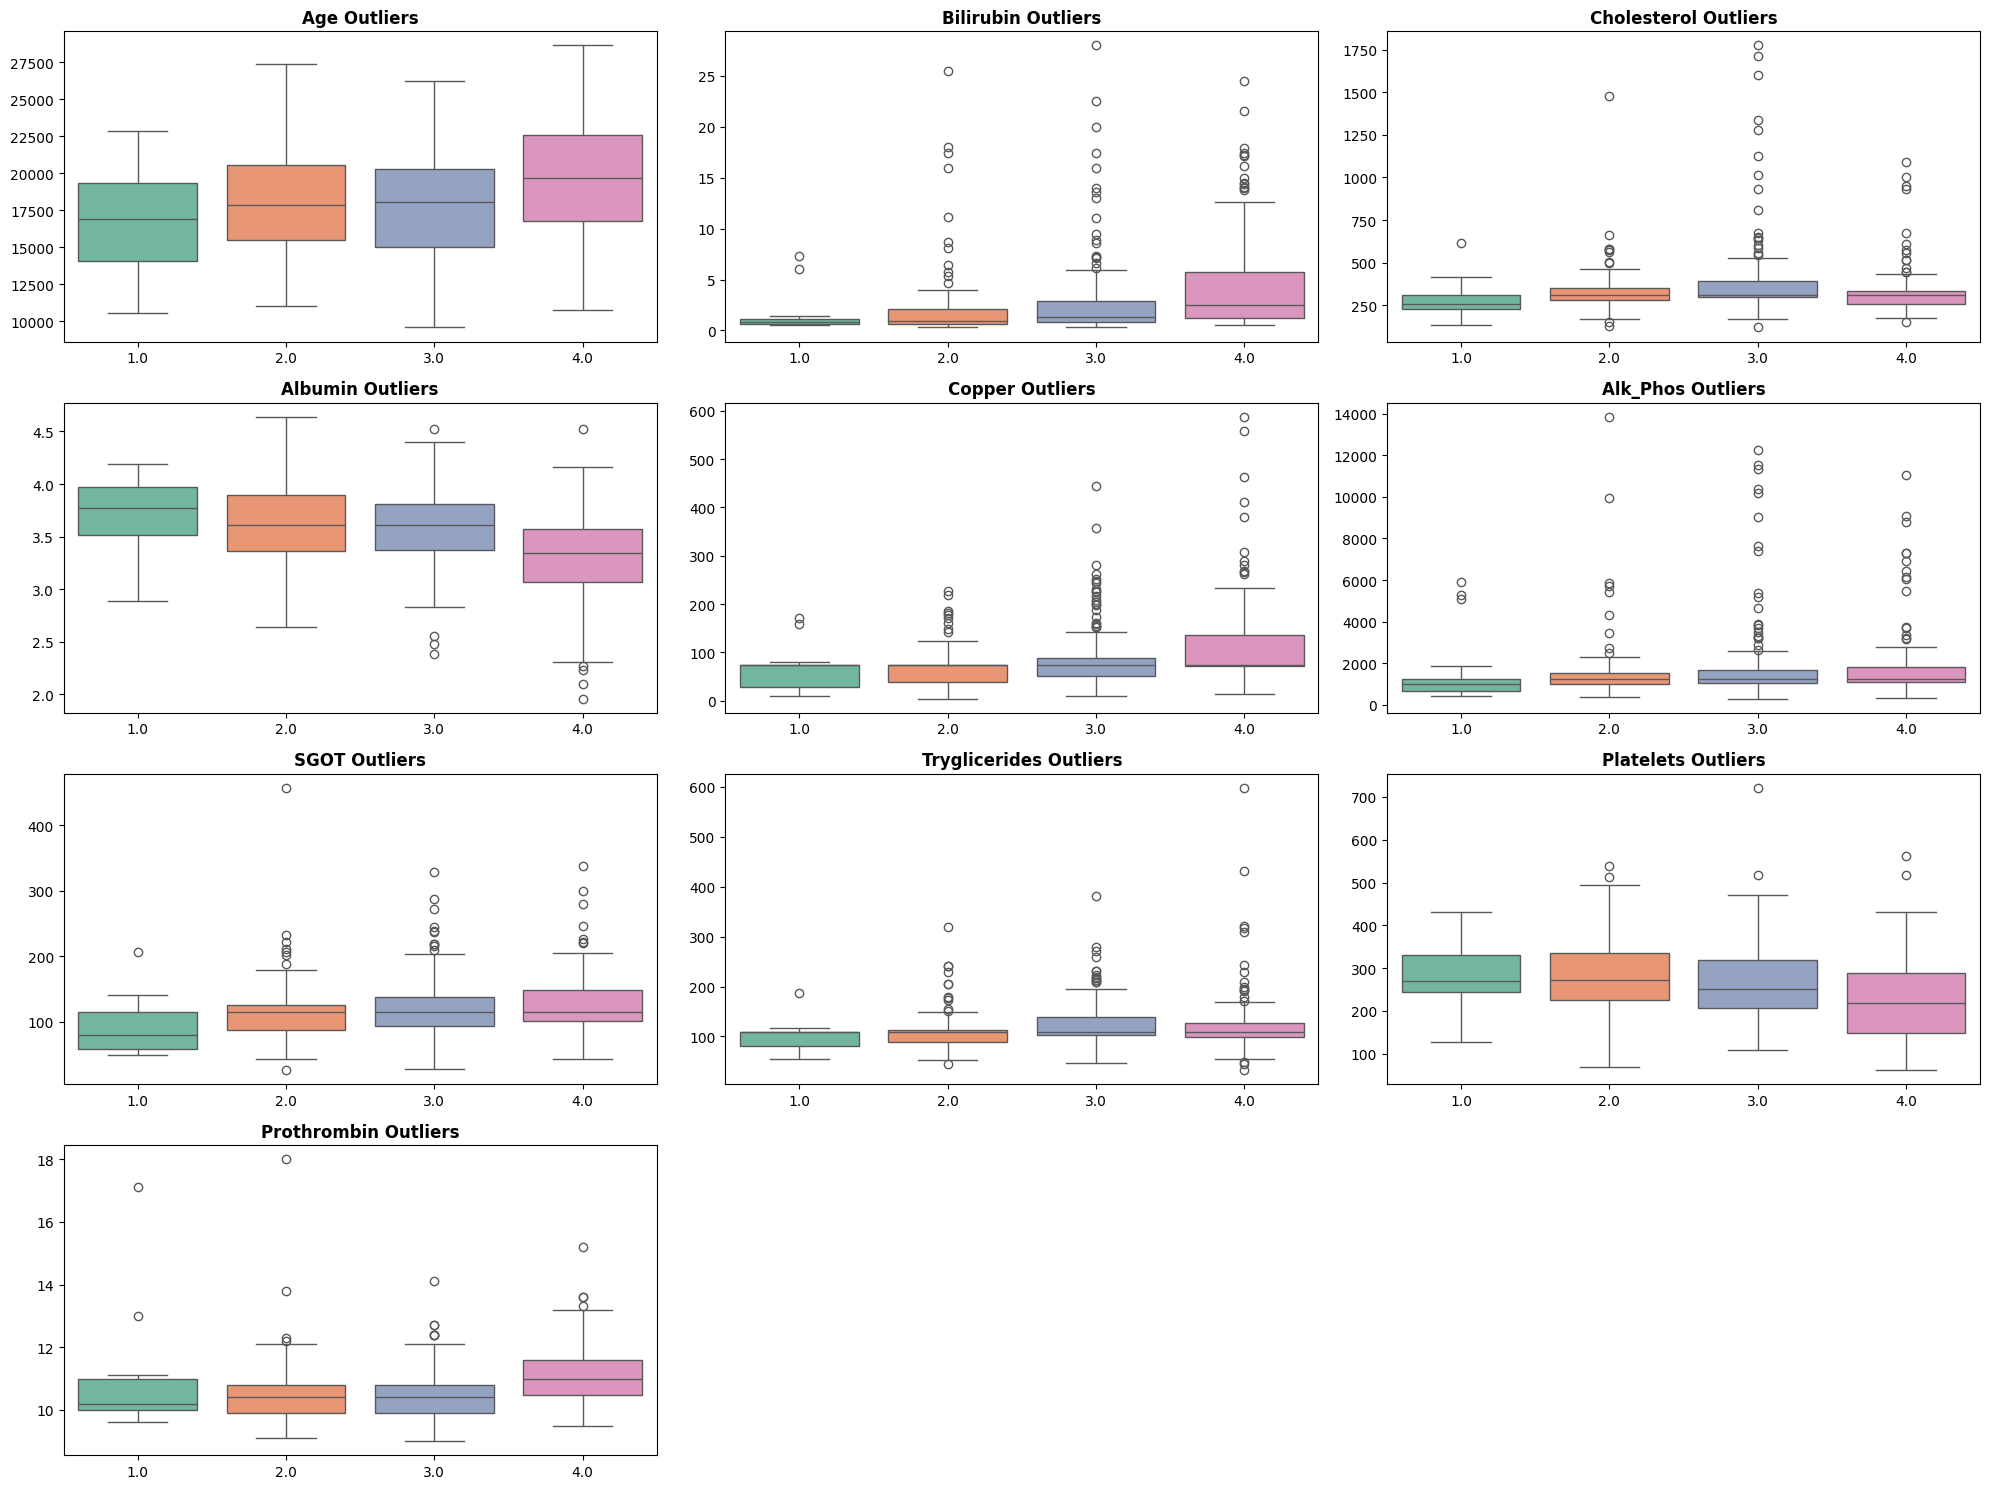

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 분석할 변수 리스트 (이전과 동일)
target_vars = ['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 
                  'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

# 실제 데이터프레임에 있는 컬럼만 필터링
valid_vars = [v for v in target_vars if v in df.columns]

# 2. 그래프 그리기 (3x3 격자)
fig, axes = plt.subplots(4, 3, figsize=(20, 15))
axes = axes.flatten() # 반복문 돌리기 쉽게 1차원으로 펼침

for i, var in enumerate(valid_vars):
    # 박스플롯 그리기
    sns.boxplot(
        data=df, 
        x='Stage', 
        y=var, 
        ax=axes[i], 
        palette='Set2' # 색상 테마 (Set2, Set3, pastel 등 변경 가능)
    )
    
    # 제목 및 스타일 설정
    axes[i].set_title(f'{var} Outliers', fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# 남는 서브플롯(빈 칸)이 있다면 제거
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

* cholesterol, Bilirubin, Aik_Phos Copper:  값이 큰 이상치가 많음 
* Albumin: 큰 이상치도 존재하지만, 아래 꼬리가 비교적 많음 
* SGOT 등은 비교적 양호  
데이터가 적으므로 지우지 않고, 로그 변환 혹은 clipping(최대 혹은 최소로 값 조정)

### Log 변화 (이상치 누르기)

In [16]:
# 0. 전처리 전 데이터 복사
loged_datas = df.copy()

# (선택사항) 로그 변환 전 결측치가 있다면 먼저 채워주는 것이 좋습니다.
# 여기서는 Stage별 중앙값으로 채우는 로직을 간단히 적용합니다.
cat_cols = loged_datas.select_dtypes(include='object').columns
num_cols = loged_datas.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    loged_datas[col] = loged_datas[col].fillna(loged_datas.groupby('Stage')[col].transform('median'))

# 1. 로그 변환할 변수 리스트 (오른쪽으로 꼬리가 긴 변수들)
skewed_features = ['Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 
                  'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

# 2. 로그 변환 수행 (np.log1p 사용)
# 실제 존재하는 컬럼에 대해서만 수행
for col in skewed_features:
    if col in loged_datas.columns:
        loged_datas[col] = np.log1p(loged_datas[col])

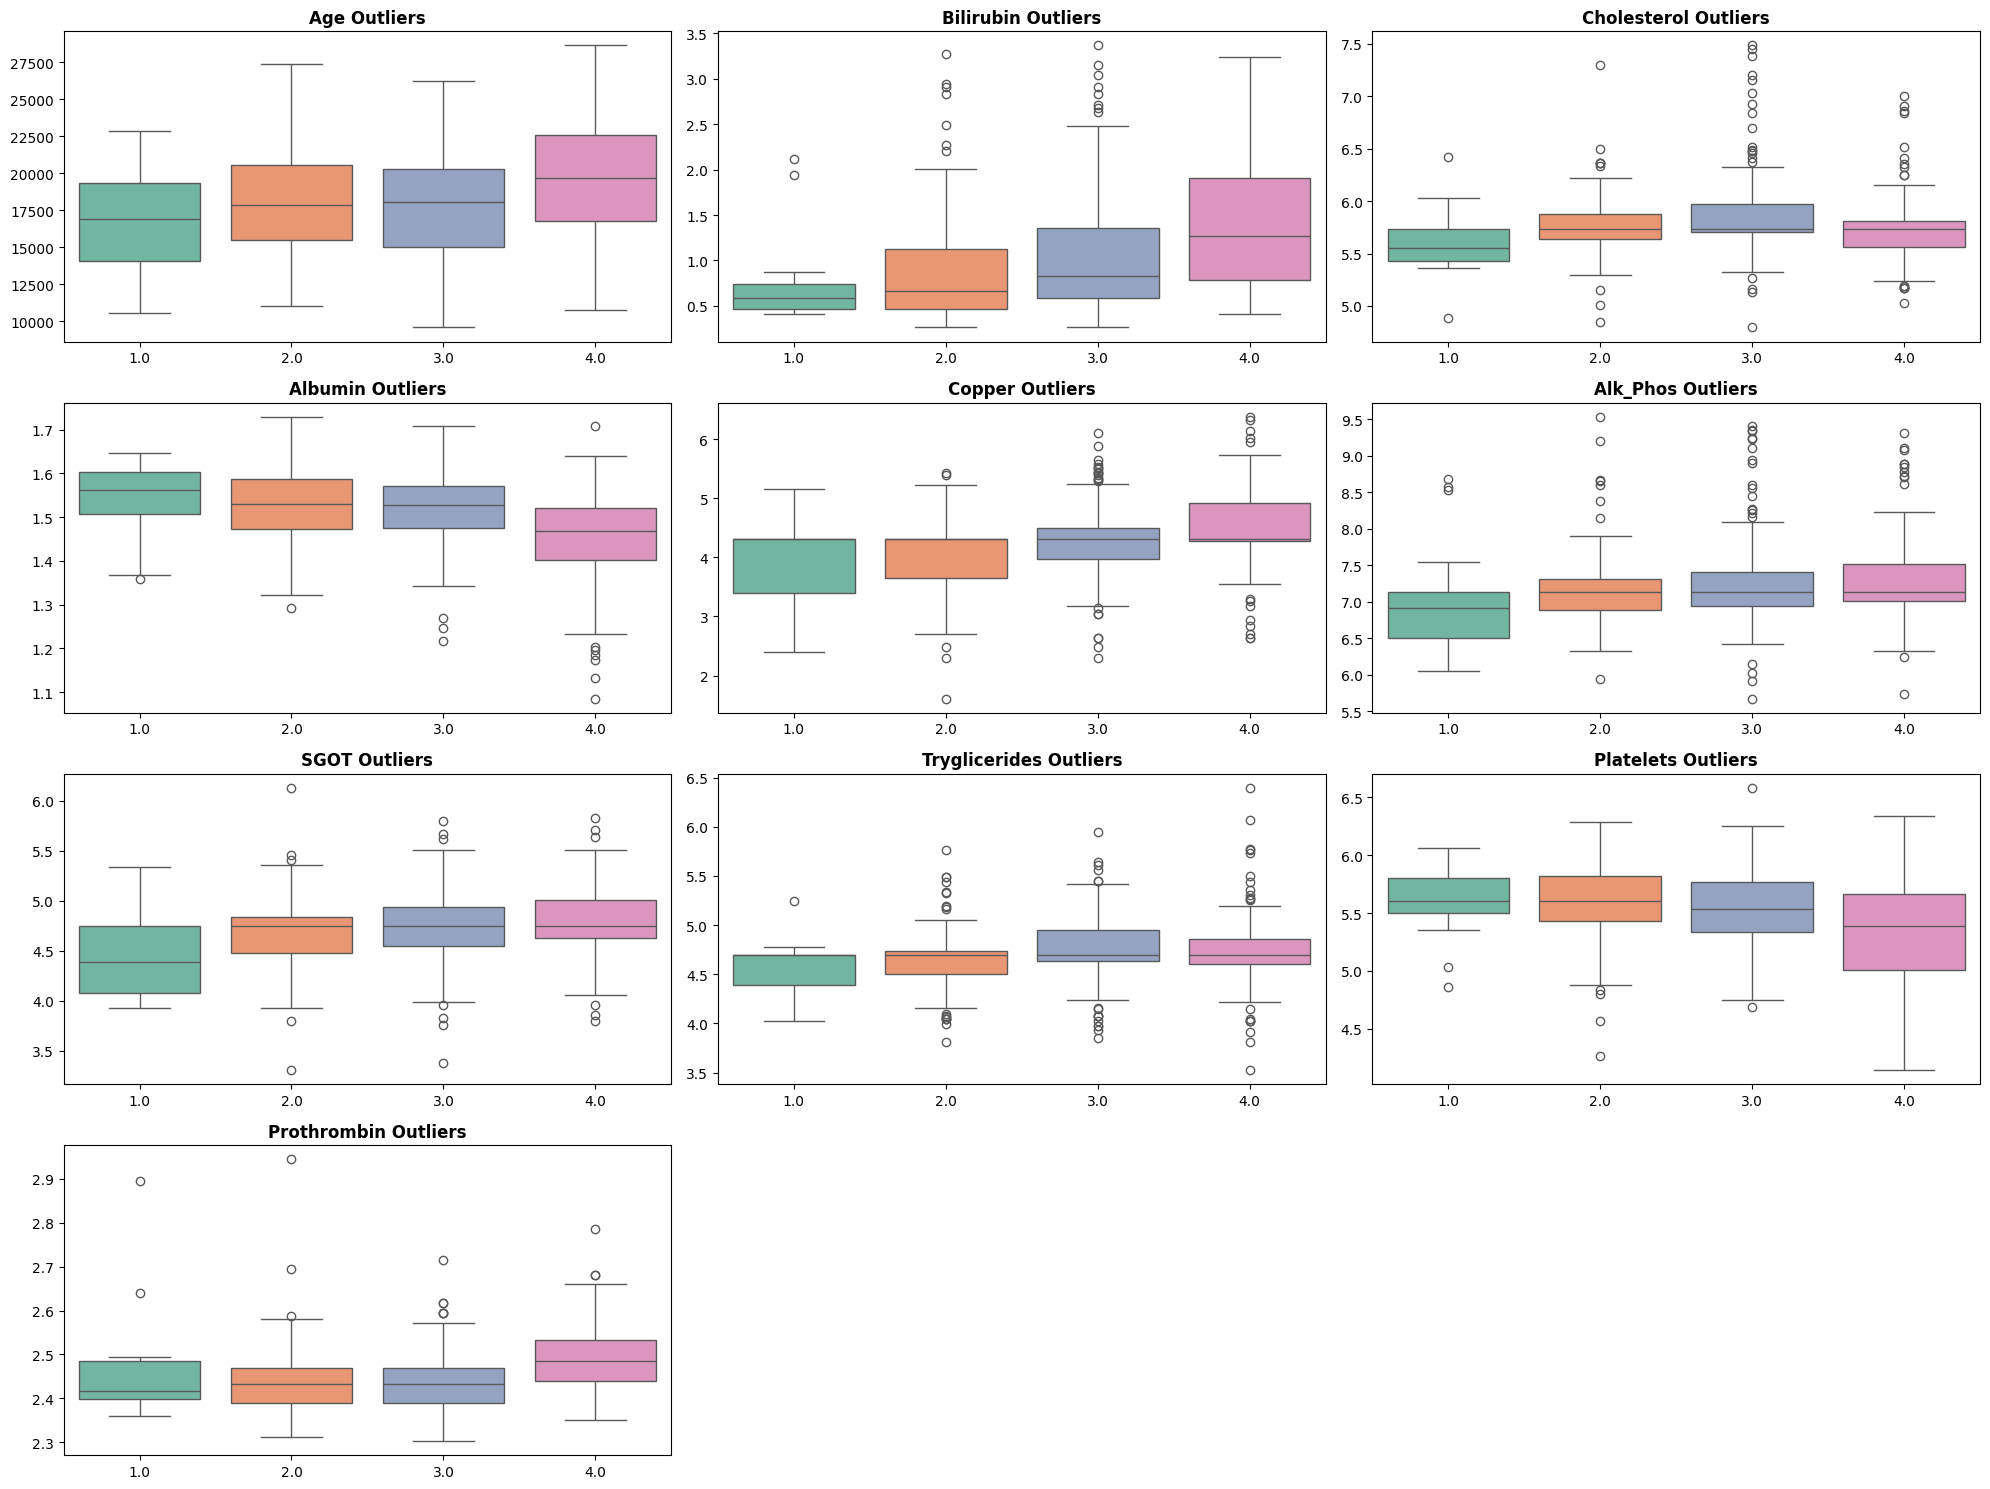

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 분석할 변수 리스트 (이전과 동일)
target_vars = ['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 
               'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']
# 실제 데이터프레임에 있는 컬럼만 필터링
valid_vars = [v for v in target_vars if v in loged_datas.columns]

# 2. 그래프 그리기 (3x3 격자)
fig, axes = plt.subplots(4, 3, figsize=(20, 15))
axes = axes.flatten() # 반복문 돌리기 쉽게 1차원으로 펼침

for i, var in enumerate(valid_vars):
    # 박스플롯 그리기
    sns.boxplot(
        data=loged_datas, 
        x='Stage', 
        y=var, 
        ax=axes[i], 
        palette='Set2' # 색상 테마 (Set2, Set3, pastel 등 변경 가능)
    )
    
    # 제목 및 스타일 설정
    axes[i].set_title(f'{var} Outliers', fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# 남는 서브플롯(빈 칸)이 있다면 제거
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### 로그 변환을 해도 아직 큰 이상치들이 많음

### clipping
* stage 별 각 변수의 상한과 하한으로 값 clipping 

In [18]:


# 1. 윈저라이징을 적용할 변수 리스트 (Age 제외)
target_vars = ['Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 
               'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

# 2. 원본 데이터 복사
clipped_df = df.copy()

# 3. Stage별로 윈저라이징 수행
# (Stage 목록을 가져와서 반복문 실행)
stages = clipped_df['Stage'].unique()

for stage in stages:
    # 해당 Stage에 해당하는 데이터만 필터링
    # 주의: 계산용으로만 쓰고, 값 변경은 clipped_df에 직접 해야 합니다.
    stage_mask = (clipped_df['Stage'] == stage)
    
    for col in target_vars:
        if col in clipped_df.columns:
            # 해당 Stage, 해당 변수의 데이터 추출
            stage_data = clipped_df.loc[stage_mask, col]
            
            # IQR 계산 (현재 Stage 기준)
            Q1 = stage_data.quantile(0.25)
            Q3 = stage_data.quantile(0.75)
            IQR = Q3 - Q1
            
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # [핵심] 해당 Stage의 데이터에만 clip 적용하여 원본(clipped_df) 업데이트
            clipped_df.loc[stage_mask, col] = stage_data.clip(lower=lower_bound, upper=upper_bound)



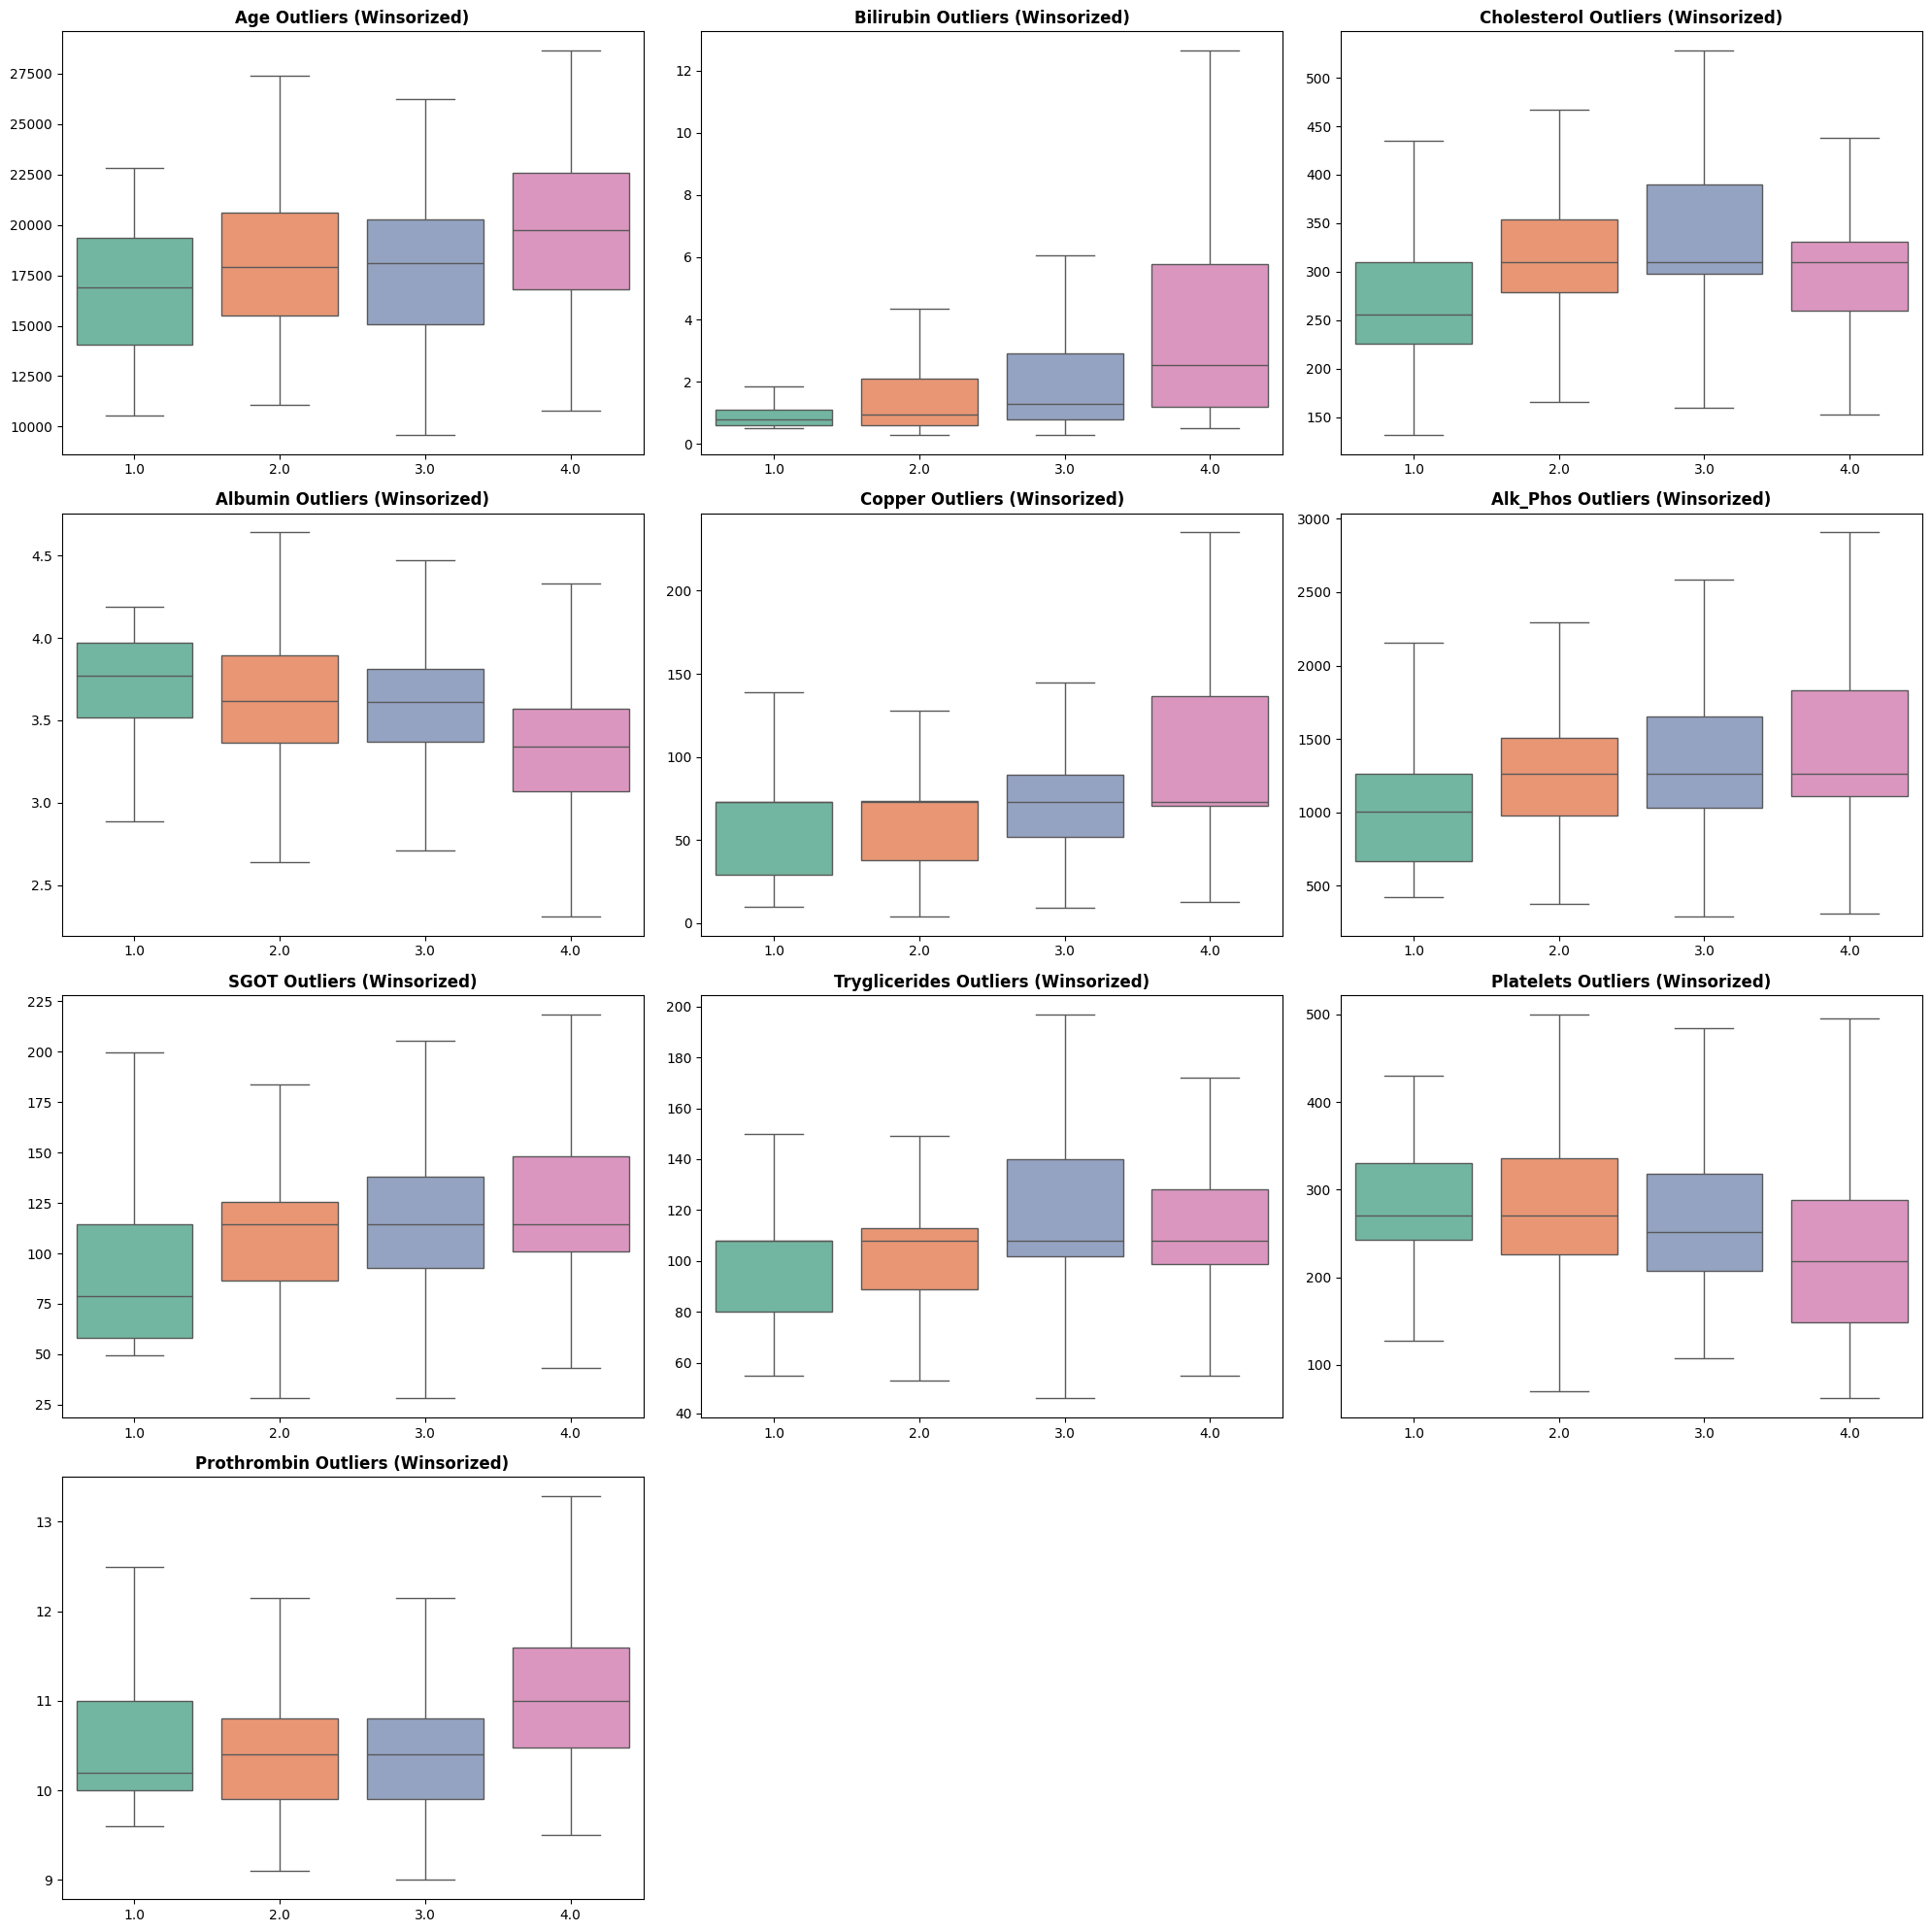

In [19]:
# 1. 분석할 변수 리스트 (10개)
target_vars = ['Age','Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 
               'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

# 실제 데이터프레임에 있는 컬럼만 필터링
valid_vars = [v for v in target_vars if v in clipped_df.columns]

# 2. 그래프 그리기 (4행 3열 = 12칸 확보)
# 10개를 그려야 하므로 3x3(9개)은 부족합니다.
fig, axes = plt.subplots(4, 3, figsize=(20, 20)) 
axes = axes.flatten() 

for i, var in enumerate(valid_vars):
    # 박스플롯 그리기
    sns.boxplot(
        data=clipped_df, 
        x='Stage', 
        y=var, 
        ax=axes[i], 
        palette='Set2'
    )
    
    # 제목 및 스타일 설정
    axes[i].set_title(f'{var} Outliers (Winsorized)', fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# 남는 서브플롯(11번째, 12번째 빈 칸) 제거
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [20]:
clipped_df.describe(include='all')

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.00,418,418,418.00,418,418,418,418,418,418.00,418.00,418.00,418.00,418.00,418.00,418.00,418.00,418.00,418.00
unique,NaN,3,2,NaN,2,2,2,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,C,D-penicillamine,NaN,F,N,Y,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,232,264,NaN,374,394,266,328,354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1917.78,NaN,NaN,18533.35,NaN,NaN,NaN,NaN,NaN,2.61,320.68,3.50,82.27,1406.07,117.80,113.00,255.88,10.69,3.02
std,1104.67,NaN,NaN,3815.85,NaN,NaN,NaN,NaN,NaN,2.82,81.32,0.41,49.04,614.12,40.36,33.66,93.82,0.85,0.88
min,41.00,NaN,NaN,9598.00,NaN,NaN,NaN,NaN,NaN,0.30,132.00,2.31,4.00,289.00,28.17,46.00,62.00,9.00,1.00
25%,1092.75,NaN,NaN,15644.50,NaN,NaN,NaN,NaN,NaN,0.80,273.00,3.24,51.25,1016.25,91.00,95.00,190.00,10.00,2.00
50%,1730.00,NaN,NaN,18628.00,NaN,NaN,NaN,NaN,NaN,1.40,309.50,3.53,73.00,1259.00,114.70,108.00,251.00,10.60,3.00
75%,2613.50,NaN,NaN,21272.50,NaN,NaN,NaN,NaN,NaN,3.40,347.75,3.77,100.75,1707.75,135.75,127.75,315.50,11.10,4.00


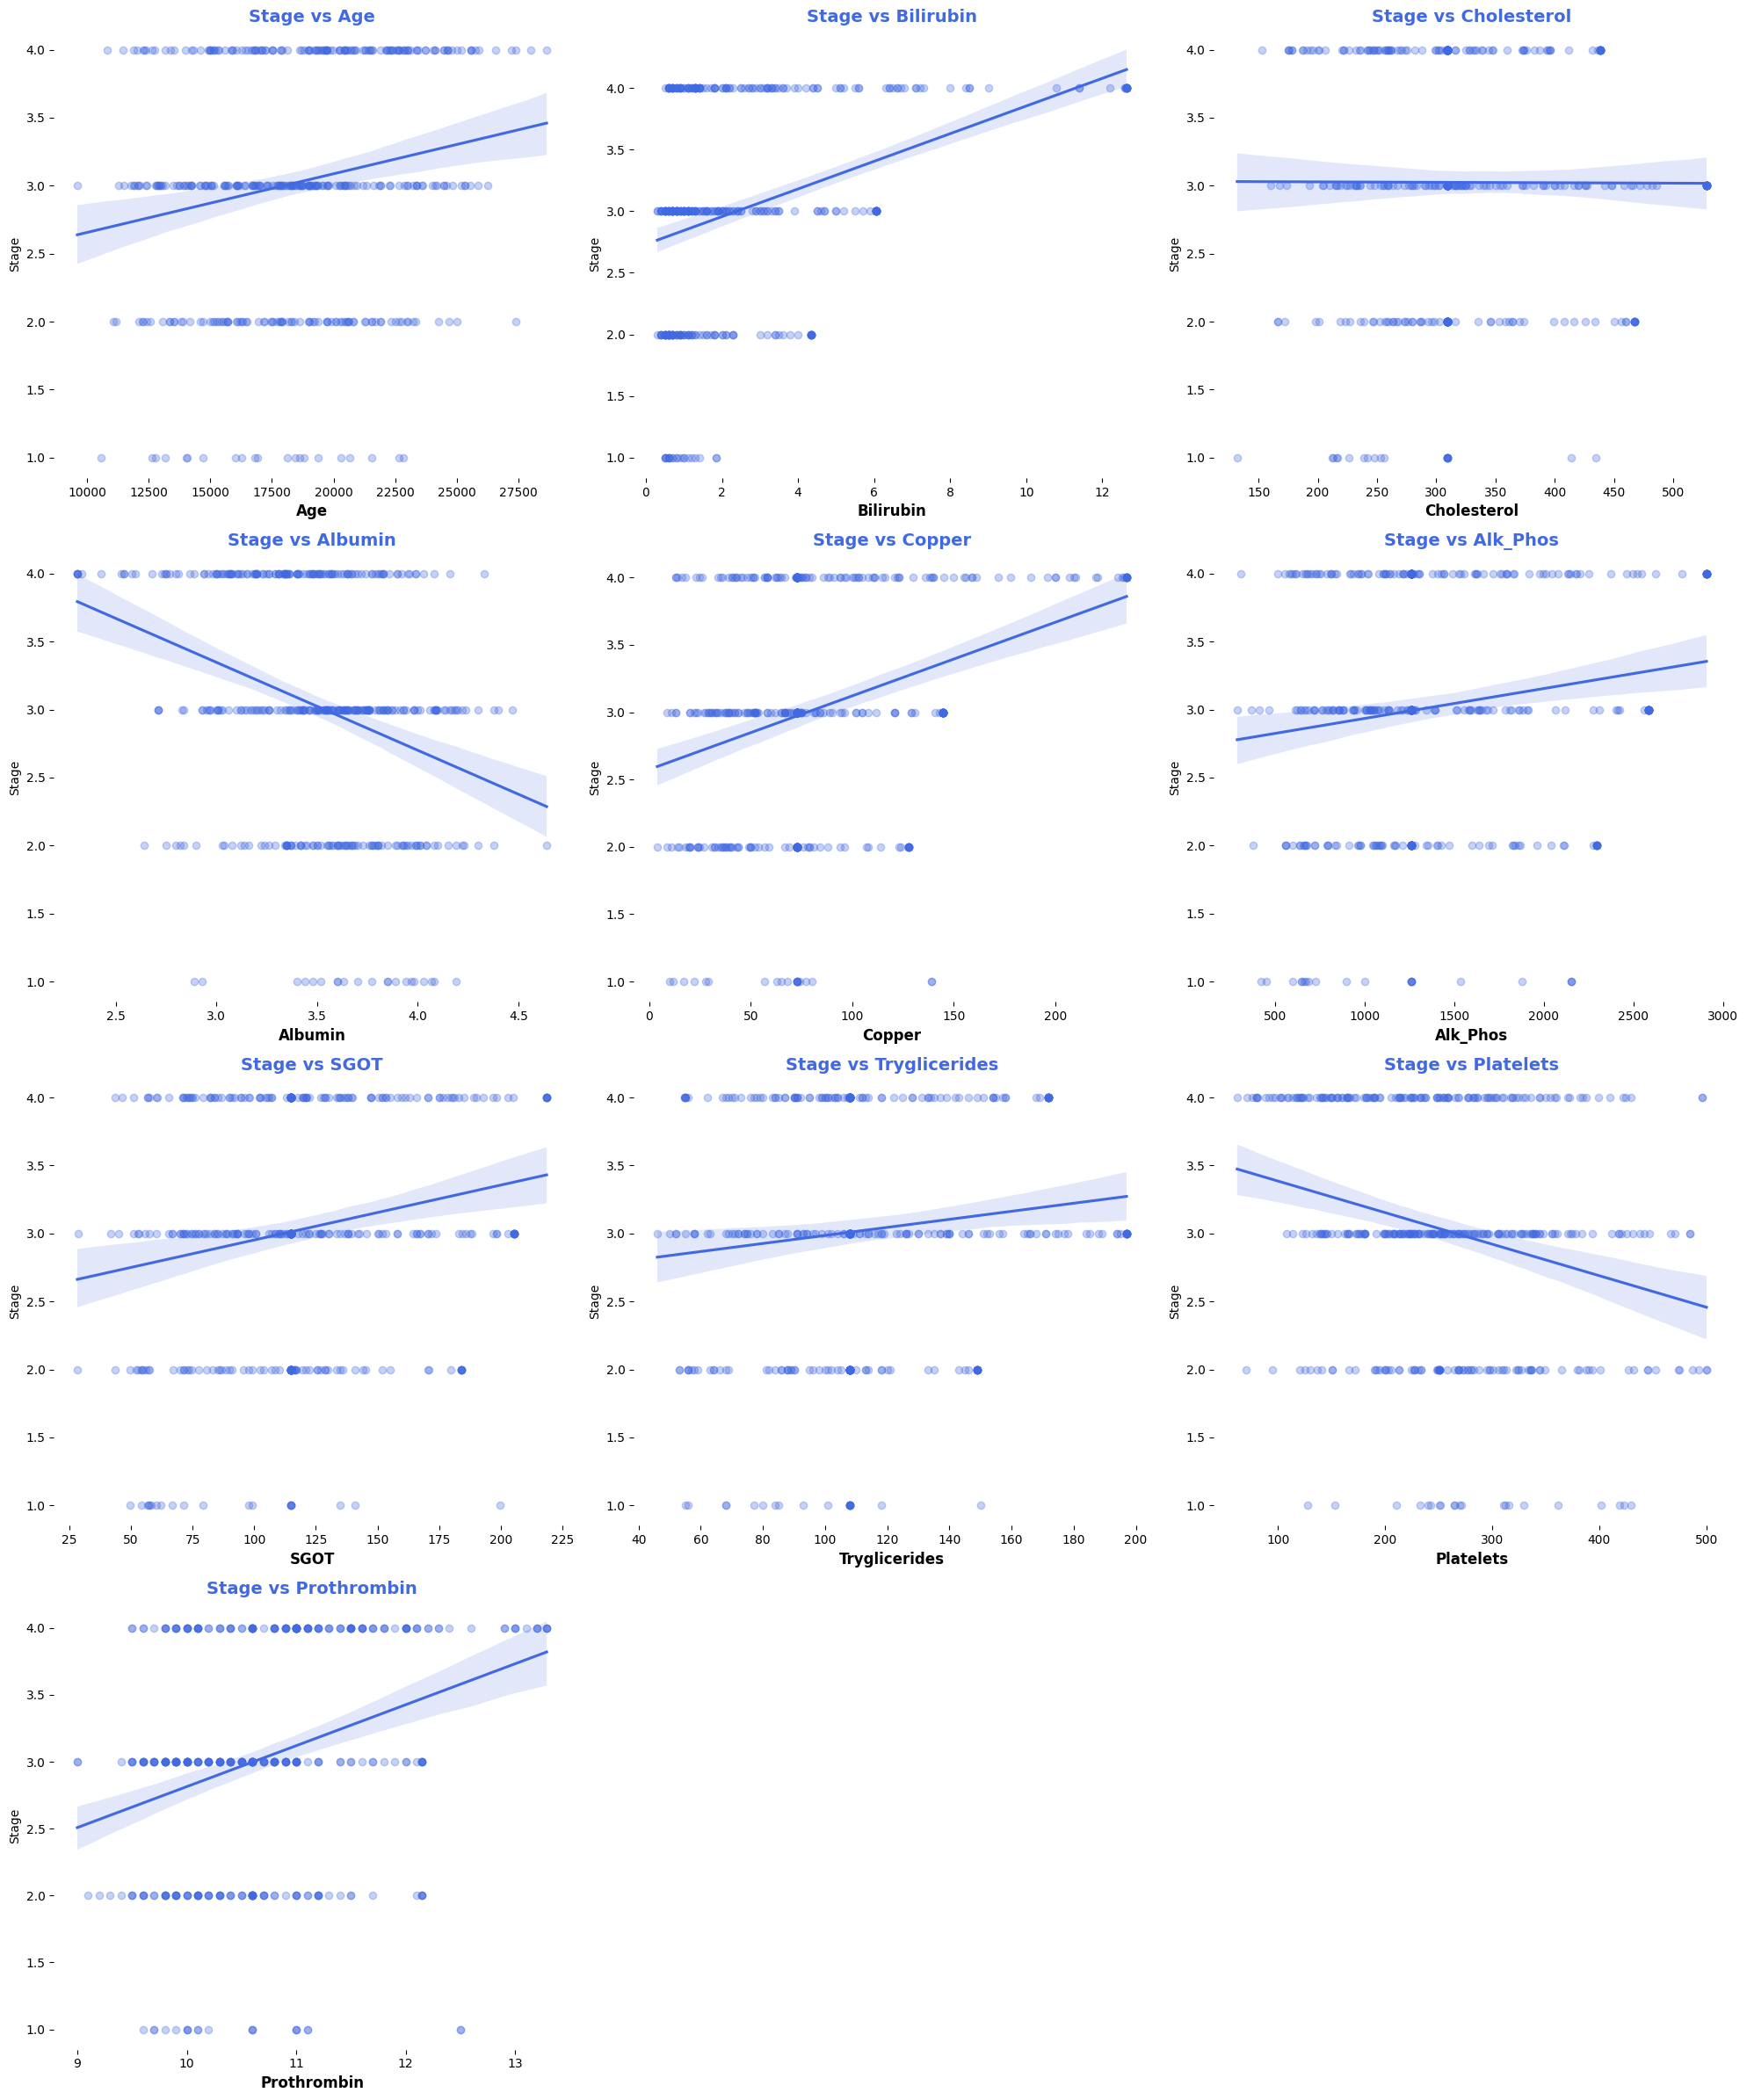

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. 분석할 변수 리스트
target_vars = ['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 
               'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

# 2. 데이터 준비 (가장 최근에 작업한 encoded_df 또는 clipped_df 사용)
# 라벨 인코딩과 윈저라이징이 끝난 데이터를 사용하는 것이 좋습니다.
plot_df = clipped_df.copy() 

# Stage가 숫자로 되어있는지 확실하게 변환 (에러 방지)
plot_df['Stage'] = pd.to_numeric(plot_df['Stage'], errors='coerce')

# 3. 그래프 그리기 (4행 3열 = 12칸)
fig, axes = plt.subplots(4, 3, figsize=(20, 24))
axes = axes.flatten()

for i, var in enumerate(target_vars):
    if var in plot_df.columns:
        # 데이터가 문자열이면 regplot을 못 그리므로 숫자형으로 변환 시도
        plot_df[var] = pd.to_numeric(plot_df[var], errors='coerce')
        
        # 회귀 그래프 그리기 (User Style 적용)
        sns.regplot(
            x=plot_df[var], 
            y=plot_df['Stage'], 
            scatter=True, 
            logistic=False,     # 선형 회귀선 표시
            color='royalblue',  # 요청하신 색상
            ax=axes[i],
            scatter_kws={'alpha': 0.3} # 점이 겹쳐도 보이게 투명도 추가 (꿀팁)
        )
        
        # 스타일링 (요청하신 despine 및 tick 설정)
        sns.despine(top=True, right=True, left=True, bottom=True, ax=axes[i])
        axes[i].tick_params(axis='both', which='both', bottom=True, top=False, left=True)
        
        axes[i].set_xlabel(var, fontsize=12, fontweight='bold')
        axes[i].set_ylabel('Stage')
        axes[i].set_title(f'Stage vs {var}', color='royalblue', fontsize=14, fontweight='bold')

# 남는 서브플롯 제거
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

1. **핵심 위험 인자 (강한 양의 상관관계 ↗)**
    * 수치가 높을수록 Stage가 높아짐 (모델의 중요 예측 변수)
    * **Bilirubin (빌리루빈):** 가장 가파른 우상향. 간부전의 핵심 지표.
    * **Prothrombin (프로트롬빈 시간):** 응고 지연 시간 증가. 매우 강력한 위험 신호.
    * **Copper (구리):** 체내 구리 축적량 증가가 병의 진행과 직결됨.

2. **핵심 기능 저하 지표 (강한 음의 상관관계 ↘)**
    * 수치가 낮을수록 Stage가 높아짐 (간 기능 저하 의미)
    * **Albumin (알부민):** 가장 뚜렷한 우하향. 간 합성 능력 저하를 나타냄.
    * **Platelets (혈소판):** 비장 비대 등으로 인한 혈소판 감소 확인.

3. **중등도 위험 인자 (약한 양의 상관관계 ↗)**
    * **Age (나이):** 고령일수록 병의 단계가 높은 경향.
    * **SGOT (AST) & Alk_Phos:** 간 손상 시 수치가 상승하나, 기울기가 아주 가파르지는 않음.

4. **상관관계 미미 (수평 ➡)**
    * Stage 예측에 큰 영향력이 없을 것으로 예상됨
    * **Cholesterol (콜레스테롤):** 기울기가 거의 없음.
    * **Triglycerides (중성지방):** 변별력이 매우 낮음.

### prepare train

In [22]:
from sklearn.preprocessing import LabelEncoder

# 1. 이전 단계에서 전처리가 완료된 데이터 복사 (원본 보존)
# 변수명이 clipped_df가 맞는지 확인하세요.
encoded_df = clipped_df.copy()

# 2. 범주형(Object) 컬럼만 골라내기
object_cols = encoded_df.select_dtypes(include='object').columns
print(f"라벨 인코딩 대상 컬럼: {list(object_cols)}")

# 3. 라벨 인코딩 수행
le = LabelEncoder()

# 나중에 어떤 숫자가 어떤 문자인지 확인하기 위해 매핑 정보를 저장할 딕셔너리
mapping_dict = {}

for col in object_cols:
    # 인코딩 수행
    encoded_df[col] = le.fit_transform(encoded_df[col])
    
    # 매핑 정보 저장 (예: 'F': 0, 'M': 1)
    mapping_dict[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# 4. 결과 확인
print("\n✅ 라벨 인코딩이 완료되었습니다.")
print("-" * 30)
display(encoded_df.head())

# 5. (참고용) 어떻게 변환되었는지 확인
print("\n🔍 변환 매핑 정보 (어떤 숫자가 어떤 문자인지):")
for col, maps in mapping_dict.items():
    print(f"{col}: {maps}")

라벨 인코딩 대상 컬럼: ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

✅ 라벨 인코딩이 완료되었습니다.
------------------------------


,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,,,,,,,,,,,,,,,,,,,
1,400,2,0,21464,0,1,1,1,2,12.64,261.00,2.60,156.00,1718.00,137.95,171.88,190.00,12.20,4.00
2,4500,0,0,20617,0,0,1,1,0,1.10,302.00,4.14,54.00,2586.00,113.52,88.00,221.00,10.60,3.00
3,1012,2,0,25594,1,0,0,0,1,1.40,176.00,3.48,210.00,516.00,96.10,55.00,151.00,12.00,4.00
4,1925,2,0,19994,0,0,1,1,1,1.80,244.00,2.54,64.00,2907.75,60.63,92.00,183.00,10.30,4.00
5,1504,1,1,13918,0,0,1,1,0,3.40,279.00,3.53,143.00,671.00,113.15,72.00,136.00,10.90,3.00



🔍 변환 매핑 정보 (어떤 숫자가 어떤 문자인지):
Status: {'C': np.int64(0), 'CL': np.int64(1), 'D': np.int64(2)}
Drug: {'D-penicillamine': np.int64(0), 'Placebo': np.int64(1)}
Sex: {'F': np.int64(0), 'M': np.int64(1)}
Ascites: {'N': np.int64(0), 'Y': np.int64(1)}
Hepatomegaly: {'N': np.int64(0), 'Y': np.int64(1)}
Spiders: {'N': np.int64(0), 'Y': np.int64(1)}
Edema: {'N': np.int64(0), 'S': np.int64(1), 'Y': np.int64(2)}


In [56]:
X=encoded_df.drop(['Stage','Drug','N_Days','Status','Age'],axis=1)
y=encoded_df[["Stage"]]

In [57]:
# 2. 개수 세기 (Stage 컬럼 기준)
stage_counts = y['Stage'].value_counts().sort_index()

# 3. 데이터프레임 만들기
df_counts = pd.DataFrame({'개수(Count)': stage_counts})

# 4. [핵심] sum을 이용해서 'Total' 행 추가하기
df_counts.loc['Total Sum'] = df_counts.sum()

# 5. 출력
print("📊 전체 데이터의 Stage별 분포:")
print("-" * 30)
print(df_counts)
print("-" * 30)

📊 전체 데이터의 Stage별 분포:
------------------------------
            개수(Count)
Stage                
1.00               21
2.00               92
3.00              161
4.00              144
 Total Sum        418
------------------------------


In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y  
)

print(f"X_Train set: {X_train.shape}")
print(f"X_Test set: {X_test.shape}")
print(f"y_Train set: {y_train.shape}")
print(f"y_Test set: {y_test.shape}")

X_Train set: (292, 14)
X_Test set: (126, 14)
y_Train set: (292, 1)
y_Test set: (126, 1)


✅ 라벨을 0~3 범위로 조정합니다 (1씩 차감).

Model                | Accuracy  
Logistic Regression  | 0.5476
Random Forest        | 0.5873
LightGBM             | 0.5714
XGBoost              | 0.5794
----------------------------------------

🔍 XGBoost 상세 평가 보고서:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.55      0.61      0.58        28
           2       0.56      0.61      0.58        49
           3       0.67      0.60      0.63        43

    accuracy                           0.58       126
   macro avg       0.44      0.46      0.45       126
weighted avg       0.57      0.58      0.57       126


📊 SHAP 해석 (XGBoost Model):


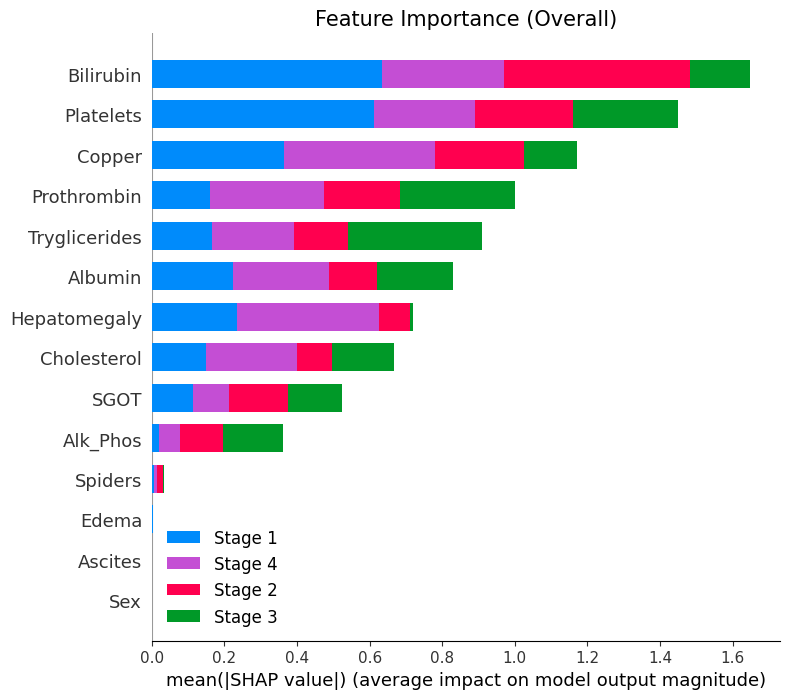

📊 SHAP 데이터 타입: <class 'numpy.ndarray'>
👉 3차원 배열 형태 감지 (Shape: (126, 14, 4))


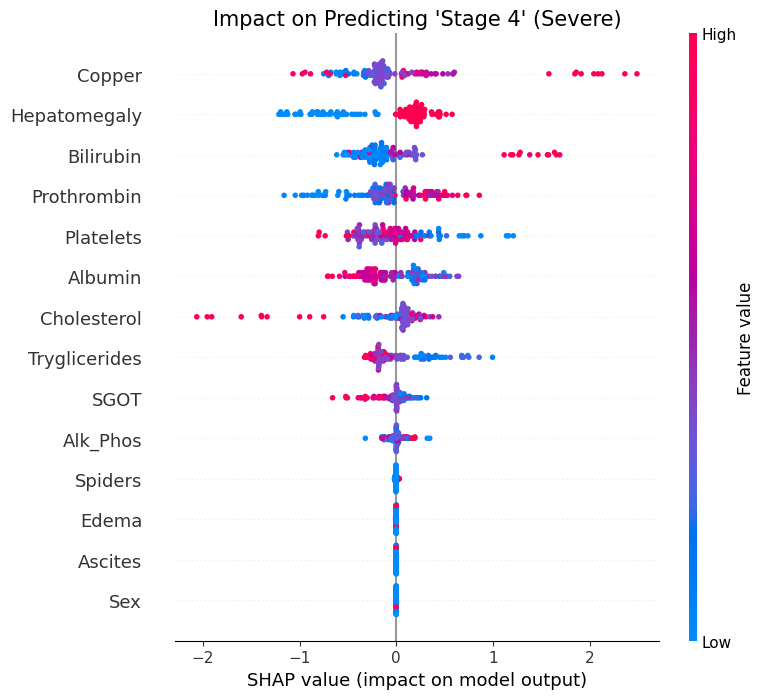

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 모델 라이브러리
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier # LightGBM 추가
# 평가 및 설명 라이브러리
from sklearn.metrics import accuracy_score, classification_report
import shap



# .values를 사용하여 데이터 타입(Series/Array) 상관없이 안전하게 최솟값 확인
if np.min(y_train.values) == 1:
    print("✅ 라벨을 0~3 범위로 조정합니다 (1씩 차감).")
    y_train = y_train.astype(int) - 1
    y_test = y_test.astype(int) - 1
else:
    print("✅ 라벨이 이미 0부터 시작하거나 조정되어 있습니다.")

models = {
    "Logistic Regression": LogisticRegression(max_iter=3000, random_state=42),

    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    
    # [NEW] LightGBM: 속도와 성능의 균형이 아주 좋음
    "LightGBM": LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42, verbose=-1),
    
    "XGBoost": XGBClassifier(
        n_estimators=100, 
        learning_rate=0.1, 
        max_depth=5, 
        random_state=42, 
        eval_metric='mlogloss',
        use_label_encoder=False
    )
}

# 모델 학습 및 정확도 비교
print("\n" + "="*40)
print(f"{'Model':<20} | {'Accuracy':<10}")
print("="*40)

trained_models = {}

for name, model in models.items():
    try:
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        acc = accuracy_score(y_test, pred)
        print(f"{name:<20} | {acc:.4f}")
        trained_models[name] = model
    except Exception as e:
        print(f"{name:<20} | Error: {e}")

print("-" * 40)

# XGBoost 상세 평가 결과
print("\n🔍 XGBoost 상세 평가 보고서:")
best_model = trained_models['XGBoost']
xgb_pred = best_model.predict(X_test)
print(classification_report(y_test, xgb_pred))

# 4. SHAP 시각화
print("\n📊 SHAP 해석 (XGBoost Model):")
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# (1) 전체 변수 중요도 (Bar Plot)
plt.figure()
plt.title("Feature Importance (Overall)", fontsize=15)
# plot_type='bar'는 형태가 달라도 보통 잘 작동합니다.
shap.summary_plot(shap_values, X_test, plot_type="bar", 
                  class_names=['Stage 1', 'Stage 2', 'Stage 3', 'Stage 4'], show=False)
plt.show()

# (2) Stage 4 영향력 분석 (형태 감지 로직 추가됨)
print(f"📊 SHAP 데이터 타입: {type(shap_values)}")
target_class_idx = 3 # Stage 4

if isinstance(shap_values, list):
    # (구버전) 리스트 형태 -> [Stage1, Stage2, Stage3, Stage4]
    print(f"👉 리스트 형태 감지 (길이: {len(shap_values)})")
    if len(shap_values) > target_class_idx:
        values_to_plot = shap_values[target_class_idx]
    else:
        values_to_plot = shap_values # 예외 처리
        
elif hasattr(shap_values, 'shape') and len(shap_values.shape) == 3:
    # (신버전) 3차원 배열 형태 -> (샘플 수, 변수 수, 클래스 수)
    print(f"👉 3차원 배열 형태 감지 (Shape: {shap_values.shape})")
    values_to_plot = shap_values[:, :, target_class_idx]
    
else:
    # 이진 분류거나 2차원 배열인 경우 그대로 사용
    print("👉 2차원 배열 형태 감지")
    values_to_plot = shap_values

# 그래프 그리기
plt.figure()
plt.title("Impact on Predicting 'Stage 4' (Severe)", fontsize=15)
shap.summary_plot(values_to_plot, X_test, show=False)
plt.show()

### GridSearch & CrossValidation


🔥 모델별 교차 검증(Cross Validation) 진행 중...
Model                | Mean CV Score   | Std Dev (안정성)
------------------------------------------------------------


Logistic Regression  | 0.5415          | ±0.0777
Random Forest        | 0.5892          | ±0.0428
LightGBM             | 0.5548          | ±0.0556
XGBoost              | 0.6164          | ±0.0511
🏆 최종 1등 모델: XGBoost (평균 정확도: 0.6164)


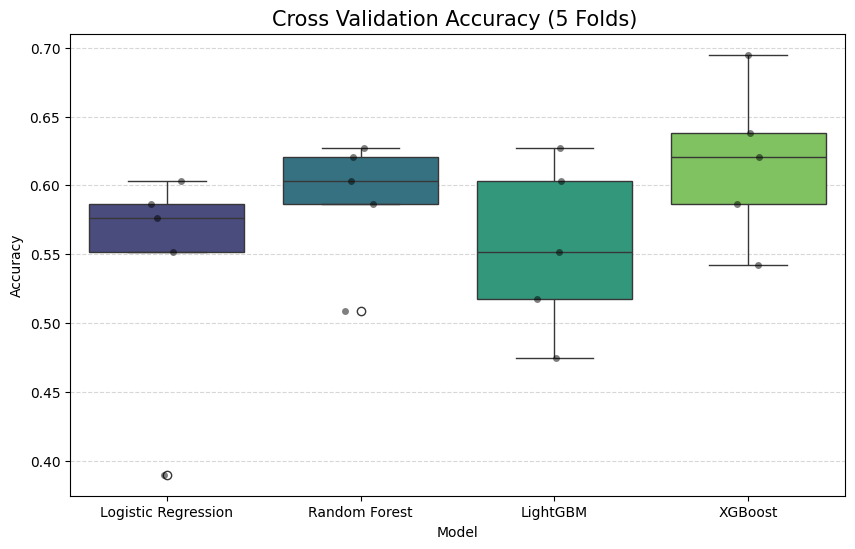


🔍 [XGBoost] 최종 테스트셋(Test Set) 상세 보고서:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.50      0.54      0.52        28
           2       0.59      0.65      0.62        49
           3       0.68      0.65      0.67        43

    accuracy                           0.60       126
   macro avg       0.44      0.46      0.45       126
weighted avg       0.57      0.60      0.58       126


📊 [XGBoost] SHAP 분석 시작...


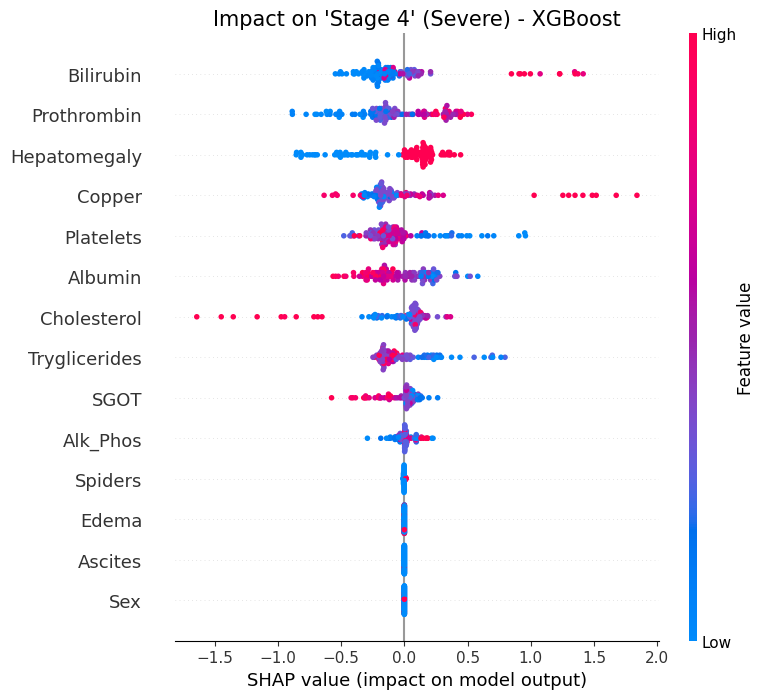

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# 경고 무시
warnings.filterwarnings('ignore')

# 모델 및 유틸리티
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
import shap


# ---------------------------------------------------------
# 1. 라벨(y) 0부터 시작하도록 조정 (안전장치)
# ---------------------------------------------------------
if np.min(y_train.values) == 1:
    y_train = y_train.astype(int) - 1
    y_test = y_test.astype(int) - 1

# ---------------------------------------------------------
# 2. 하이퍼파라미터 그리드 (탐색 범위)
# ---------------------------------------------------------
param_grids = {
    "Logistic Regression": {
        'model': LogisticRegression(random_state=42, max_iter=3000),
        'params': {'C': [0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']}
    },
    "Random Forest": {
        'model': RandomForestClassifier(random_state=42),
        'params': {'n_estimators': [100, 200], 'max_depth': [5, 10, None], 'min_samples_leaf': [1, 2]}
    },
    "LightGBM": {
            'model': LGBMClassifier(random_state=42, verbose=-1), # verbose=-1: 불필요한 경고 끄기
            'params': {
                'n_estimators': [100, 200], 
                'learning_rate': [0.05, 0.1], 
                'max_depth': [3, 5, 10]
            }
        },
    "XGBoost": {
        'model': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
        'params': {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5]}
    }
}

# ---------------------------------------------------------
# 3. GridSearch & Cross Validation 상세 분석
# ---------------------------------------------------------
results_list = []      # 그래프 그리기용 데이터 저장소
best_models = {}       # 튜닝된 최적 모델 저장소
final_best_score = 0
final_best_name = ""

print("\n🔥 모델별 교차 검증(Cross Validation) 진행 중...")
print("="*60)
print(f"{'Model':<20} | {'Mean CV Score':<15} | {'Std Dev (안정성)'}")
print("-" * 60)

# 5-Fold 설정 (Stratified: 라벨 비율 유지)
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, config in param_grids.items():
    # 1) 그리드 서치로 '최적 파라미터' 찾기
    grid = GridSearchCV(config['model'], config['params'], cv=cv_strategy, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    
    # 2) 찾은 최적 모델 저장
    best_model = grid.best_estimator_
    best_models[name] = best_model
    
    # 3) [핵심] 최적 모델로 다시 CV를 돌려서 '5번의 점수'를 모두 확보
    # 이렇게 해야 그래프를 그릴 수 있습니다.
    cv_scores = cross_val_score(best_model, X_train, y_train, cv=cv_strategy, scoring='accuracy')
    
    # 결과 출력
    mean_score = cv_scores.mean()
    std_score = cv_scores.std()
    print(f"{name:<20} | {mean_score:.4f}          | ±{std_score:.4f}")
    
    # 그래프용 데이터 저장
    for score in cv_scores:
        results_list.append({'Model': name, 'CV Accuracy': score})
        
    # 챔피언 모델 갱신
    if mean_score > final_best_score:
        final_best_score = mean_score
        final_best_name = name

print("="*60)
print(f"🏆 최종 1등 모델: {final_best_name} (평균 정확도: {final_best_score:.4f})")

# ---------------------------------------------------------
# 4. 교차 검증 결과 시각화 (Box Plot)
# ---------------------------------------------------------
results_df = pd.DataFrame(results_list)

plt.figure(figsize=(10, 6))
# 박스 플롯: 점수 분포와 안정성을 보여줌
sns.boxplot(data=results_df, x='Model', y='CV Accuracy', palette='viridis')
# 스트립 플롯: 실제 점수 하나하나를 점으로 찍어줌
sns.stripplot(data=results_df, x='Model', y='CV Accuracy', color='black', alpha=0.5, jitter=True)

plt.title(f'Cross Validation Accuracy (5 Folds) ', fontsize=15)
plt.ylabel('Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# ---------------------------------------------------------
# 5. 최종 모델 테스트셋 평가
# ---------------------------------------------------------
print(f"\n🔍 [{final_best_name}] 최종 테스트셋(Test Set) 상세 보고서:")
final_model = best_models[final_best_name]
final_pred = final_model.predict(X_test)
print(classification_report(y_test, final_pred))

# ---------------------------------------------------------
# 6. SHAP 분석
# ---------------------------------------------------------
print(f"\n📊 [{final_best_name}] SHAP 분석 시작...")

if final_best_name in ["Random Forest", "XGBoost"]:
    explainer = shap.TreeExplainer(final_model)
    shap_values = explainer.shap_values(X_test)
else:
    # SVM, LR용 (속도 최적화)
    background = shap.kmeans(X_train, 10)
    explainer = shap.KernelExplainer(final_model.predict_proba, background)
    shap_values = explainer.shap_values(X_test)

# Stage 4 영향력 분석
target_idx = 3
if isinstance(shap_values, list):
    values_to_plot = shap_values[target_idx] if len(shap_values) > target_idx else shap_values
elif hasattr(shap_values, 'shape') and len(shap_values.shape) == 3:
    values_to_plot = shap_values[:, :, target_idx]
else:
    values_to_plot = shap_values

plt.figure()
plt.title(f"Impact on 'Stage 4' (Severe) - {final_best_name}", fontsize=15)
shap.summary_plot(values_to_plot, X_test, show=False)
plt.show()

### SMOTE 적용

In [53]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"smote 전 Train 개수: {len(X_train)}")
print(y_train['Stage'].value_counts().sort_index())
print("-" * 30)


smote = SMOTE(random_state=42, k_neighbors=3)


X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print(f"smote 후 Train 개수: {len(X_train_res)}")
print(y_train_res['Stage'].value_counts().sort_index())
print("-" * 30)

# 4. 보기 편하게 표로 정리
df_res = pd.DataFrame({
    'Before (Original)': y_train['Stage'].value_counts().sort_index(),
    'After (SMOTE)': y_train_res['Stage'].value_counts().sort_index()
})
df_res.loc['Total'] = df_res.sum()
print("\n📊 데이터 증강 결과 비교:")
display(df_res)

smote 전 Train 개수: 292
Stage
1.00     15
2.00     64
3.00    112
4.00    101
Name: count, dtype: int64
------------------------------
smote 후 Train 개수: 448
Stage
1.00    112
2.00    112
3.00    112
4.00    112
Name: count, dtype: int64
------------------------------

📊 데이터 증강 결과 비교:


,Before (Original),After (SMOTE)
Stage,,
1.00,15,112
2.00,64,112
3.00,112,112
4.00,101,112
Total,292,448


✅ 라벨을 0~3 범위로 조정합니다 (1씩 차감).

Model                | Accuracy  
Logistic Regression  | 0.4286
LightGBM             | 0.5476
Random Forest        | 0.5159
XGBoost              | 0.5238
----------------------------------------

🔍 XGBoost 상세 평가 보고서:
              precision    recall  f1-score   support

           0       0.07      0.17      0.10         6
           1       0.52      0.54      0.53        28
           2       0.59      0.49      0.53        49
           3       0.63      0.60      0.62        43

    accuracy                           0.52       126
   macro avg       0.45      0.45      0.44       126
weighted avg       0.56      0.52      0.54       126


📊 SHAP 해석 (XGBoost Model):


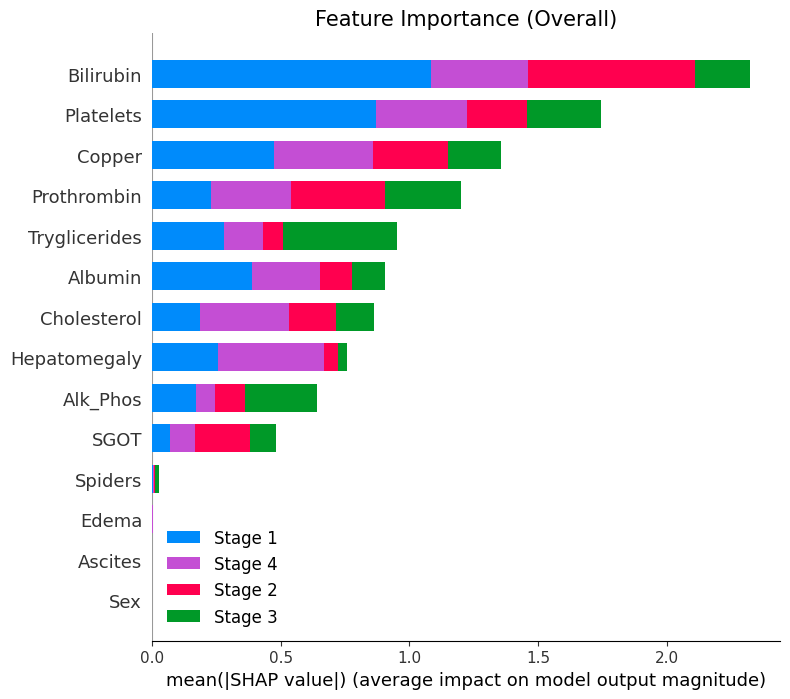

📊 SHAP 데이터 타입: <class 'numpy.ndarray'>
👉 3차원 배열 형태 감지 (Shape: (126, 14, 4))


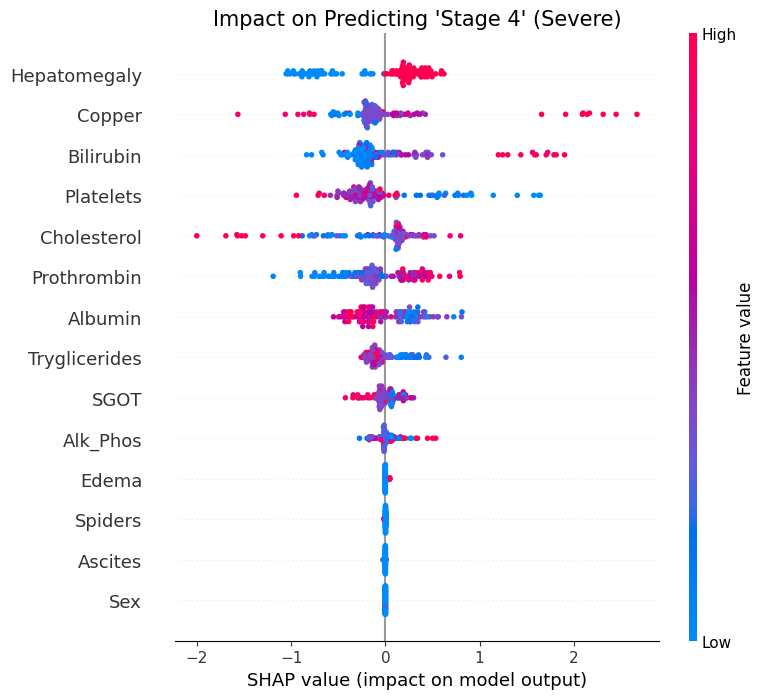

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 모델 라이브러리
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier # Extra Trees 추가from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier # LightGBM 추가

# 평가 및 설명 라이브러리
from sklearn.metrics import accuracy_score, classification_report
import shap


# .values를 사용하여 데이터 타입(Series/Array) 상관없이 안전하게 최솟값 확인
if np.min(y_train_res.values) == 1:
    print("✅ 라벨을 0~3 범위로 조정합니다 (1씩 차감).")
    y_train_res = y_train_res.astype(int) - 1
    y_test = y_test.astype(int) - 1
else:
    print("✅ 라벨이 이미 0부터 시작하거나 조정되어 있습니다.")
# 학습할 모델
models = {
    "Logistic Regression": LogisticRegression(max_iter=3000, random_state=42),
    
    # [추천] Extra Trees: 랜덤 포레스트보다 빠르고 성능이 좋습니다. (설치 불필요)
    "LightGBM": LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42, verbose=-1),
    
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    
    "XGBoost": XGBClassifier(
        n_estimators=100, 
        learning_rate=0.1, 
        max_depth=5, 
        random_state=42, 
        eval_metric='mlogloss',
        use_label_encoder=False
    )
}

# 모델 학습 및 정확도 비교
print("\n" + "="*40)
print(f"{'Model':<20} | {'Accuracy':<10}")
print("="*40)

trained_models = {}

for name, model in models.items():
    try:
        model.fit(X_train_res, y_train_res)
        pred = model.predict(X_test)
        acc = accuracy_score(y_test, pred)
        print(f"{name:<20} | {acc:.4f}")
        trained_models[name] = model
    except Exception as e:
        print(f"{name:<20} | Error: {e}")

print("-" * 40)

# 3. XGBoost 상세 평가 결과
print("\n🔍 XGBoost 상세 평가 보고서:")
best_model = trained_models['XGBoost']
xgb_pred = best_model.predict(X_test)
print(classification_report(y_test, xgb_pred))

# 4. SHAP 시각화
print("\n📊 SHAP 해석 (XGBoost Model):")
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# (1) 전체 변수 중요도 (Bar Plot)
plt.figure()
plt.title("Feature Importance (Overall)", fontsize=15)
# plot_type='bar'는 형태가 달라도 보통 잘 작동합니다.
shap.summary_plot(shap_values, X_test, plot_type="bar", 
                  class_names=['Stage 1', 'Stage 2', 'Stage 3', 'Stage 4'], show=False)
plt.show()

# (2) Stage 4 영향력 분석 (형태 감지 로직 추가됨)
print(f"📊 SHAP 데이터 타입: {type(shap_values)}")
target_class_idx = 3 # Stage 4

if isinstance(shap_values, list):
    # (구버전) 리스트 형태 -> [Stage1, Stage2, Stage3, Stage4]
    print(f"👉 리스트 형태 감지 (길이: {len(shap_values)})")
    if len(shap_values) > target_class_idx:
        values_to_plot = shap_values[target_class_idx]
    else:
        values_to_plot = shap_values # 예외 처리
        
elif hasattr(shap_values, 'shape') and len(shap_values.shape) == 3:
    # (신버전) 3차원 배열 형태 -> (샘플 수, 변수 수, 클래스 수)
    print(f"👉 3차원 배열 형태 감지 (Shape: {shap_values.shape})")
    values_to_plot = shap_values[:, :, target_class_idx]
    
else:
    # 이진 분류거나 2차원 배열인 경우 그대로 사용
    print("👉 2차원 배열 형태 감지")
    values_to_plot = shap_values

# 그래프 그리기
plt.figure()
plt.title("Impact on Predicting 'Stage 4' (Severe)", fontsize=15)
shap.summary_plot(values_to_plot, X_test, show=False)
plt.show()

✅ 라벨을 0~3 범위로 조정합니다 (1씩 차감).

🔥 [SMOTE 데이터] 모델별 튜닝 및 교차 검증 진행 중...
Model                | Mean CV Score   | Std Dev
------------------------------------------------------------
Logistic Regression  | 0.4935          | ±0.0631
Random Forest        | 0.5618          | ±0.0712
LightGBM             | 0.5445          | ±0.0463
XGBoost              | 0.5721          | ±0.0436
🏆 최종 1등 모델: XGBoost (CV Score: 0.5721)


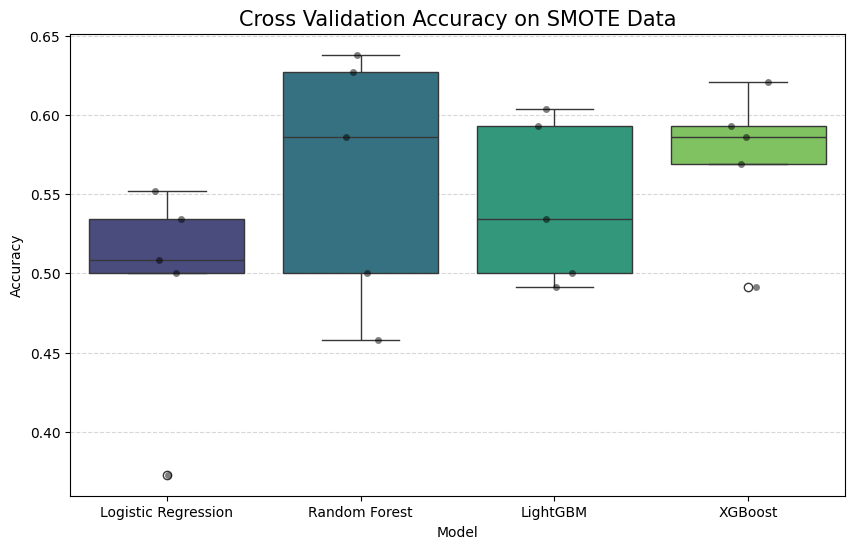


🔍 [XGBoost] 최종 테스트셋(Real World Data) 상세 보고서:
              precision    recall  f1-score   support

           0       0.14      0.33      0.20         6
           1       0.53      0.61      0.57        28
           2       0.60      0.53      0.57        49
           3       0.68      0.58      0.62        43

    accuracy                           0.56       126
   macro avg       0.49      0.51      0.49       126
weighted avg       0.59      0.56      0.57       126


📊 [XGBoost] SHAP 분석 시작...


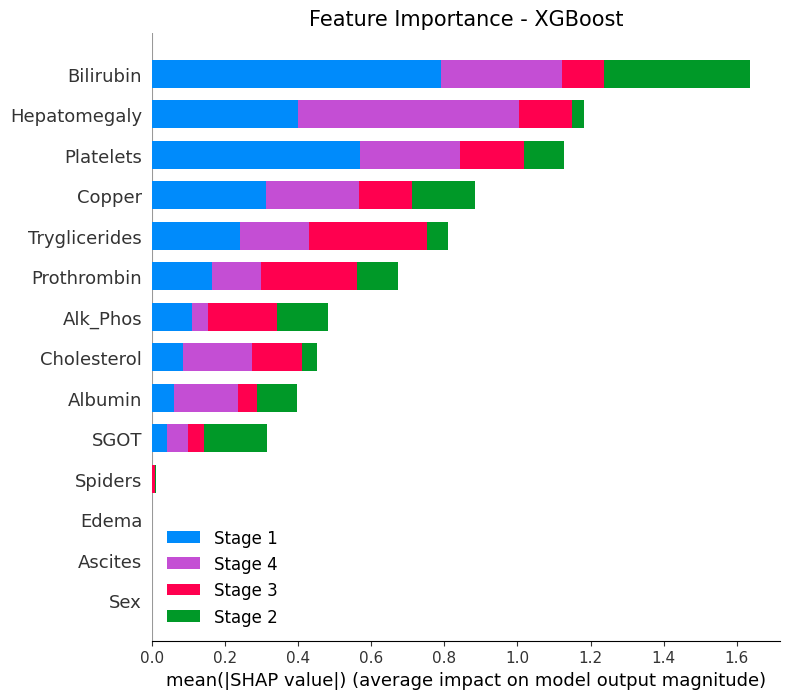

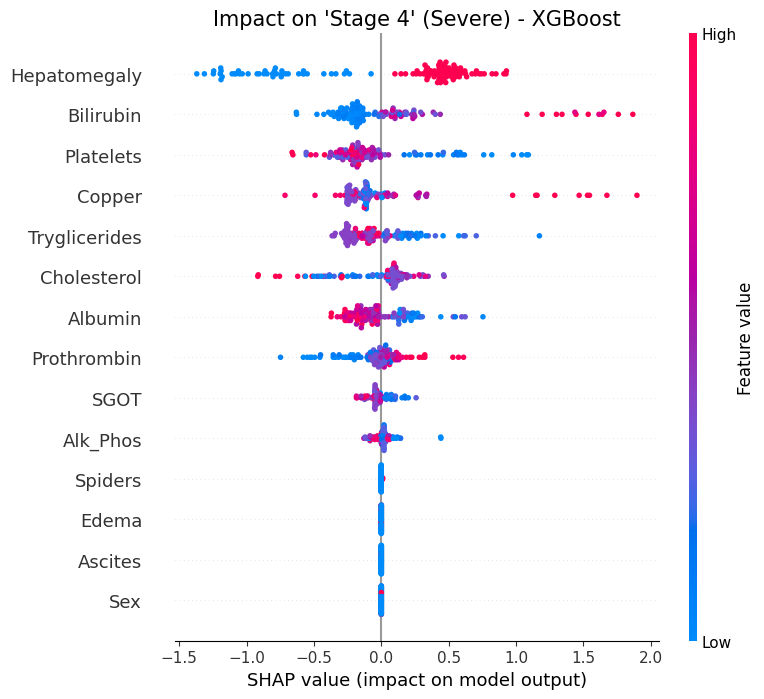

In [60]:
# 일반 pipeline이 아니라 imblearn 전용 pipeline이어야 합니다.
from imblearn.pipeline import Pipeline as ImbPipeline

if np.min(y_train) == 1:
    print("✅ 라벨을 0~3 범위로 조정합니다 (1씩 차감).")
    y_train = y_train.astype(int) - 1
    y_test = y_test.astype(int) - 1
else:
    print("✅ 라벨이 이미 0부터 시작하거나 조정되어 있습니다.")

# ---------------------------------------------------------
# 2. 하이퍼파라미터 그리드 (SMOTE 데이터용)
# ---------------------------------------------------------
param_grids = {
    "Logistic Regression": {
        'model': ImbPipeline([
            ('smote', SMOTE(random_state=42)), 
            ('classifier', LogisticRegression(random_state=42, max_iter=3000))
        ]),
        'params': {
            'classifier__C': [0.1, 1, 10], 
            'classifier__solver': ['lbfgs', 'liblinear']
        }
    },
    "Random Forest": {
        'model': ImbPipeline([
            ('smote', SMOTE(random_state=42)), 
            ('classifier', RandomForestClassifier(random_state=42))
        ]),
        'params': {
            'classifier__n_estimators': [100, 200], 
            'classifier__max_depth': [5, 10, None],
            'classifier__min_samples_leaf': [1, 2]
        }
    },
    "LightGBM": {
        'model': ImbPipeline([
            ('smote', SMOTE(random_state=42)), 
            ('classifier', LGBMClassifier(random_state=42, verbose=-1))
        ]),
        'params': {
            'classifier__n_estimators': [100, 200], 
            'classifier__learning_rate': [0.05, 0.1], 
            'classifier__max_depth': [3, 5, 10]
        }
    },
    "XGBoost": {
        'model': ImbPipeline([
            ('smote', SMOTE(random_state=42)), 
            ('classifier', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'))
        ]),
        'params': {
            'classifier__n_estimators': [100, 200], 
            'classifier__learning_rate': [0.05, 0.1], 
            'classifier__max_depth': [3, 5]
        }
    }
}

# ---------------------------------------------------------
# 3. GridSearch & Cross Validation (Training Data: X_train_res)
# ---------------------------------------------------------
results_list = []      
best_models = {}       
final_best_score = 0
final_best_name = ""

print("\n🔥 [SMOTE 데이터] 모델별 튜닝 및 교차 검증 진행 중...")
print("="*60)
print(f"{'Model':<20} | {'Mean CV Score':<15} | {'Std Dev'}")
print("-" * 60)

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, config in param_grids.items():
    try:
        # 1) Grid Search (증강 데이터로 학습)
        grid = GridSearchCV(config['model'], config['params'], cv=cv_strategy, scoring='accuracy', n_jobs=-1)
        grid.fit(X_train, y_train)
        
        # 2) 최적 모델 저장
        best_model = grid.best_estimator_
        best_models[name] = best_model
        
        # 3) CV 점수 확인
        cv_scores = cross_val_score(best_model, X_train, y_train, cv=cv_strategy, scoring='accuracy')
        
        mean_score = cv_scores.mean()
        std_score = cv_scores.std()
        print(f"{name:<20} | {mean_score:.4f}          | ±{std_score:.4f}")
        
        for score in cv_scores:
            results_list.append({'Model': name, 'CV Accuracy': score})
            
        if mean_score > final_best_score:
            final_best_score = mean_score
            final_best_name = name
            
    except Exception as e:
        print(f"{name:<20} | Error: {e}")

print("="*60)
print(f"🏆 최종 1등 모델: {final_best_name} (CV Score: {final_best_score:.4f})")

# ---------------------------------------------------------
# 4. 교차 검증 결과 시각화
# ---------------------------------------------------------
results_df = pd.DataFrame(results_list)

plt.figure(figsize=(10, 6))
sns.boxplot(data=results_df, x='Model', y='CV Accuracy', palette='viridis')
sns.stripplot(data=results_df, x='Model', y='CV Accuracy', color='black', alpha=0.5, jitter=True)
plt.title('Cross Validation Accuracy on SMOTE Data', fontsize=15)
plt.ylabel('Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# ---------------------------------------------------------
# 5. [중요] 원본 테스트셋(Test Set) 최종 평가
# ---------------------------------------------------------
print(f"\n🔍 [{final_best_name}] 최종 테스트셋(Real World Data) 상세 보고서:")
final_model = best_models[final_best_name]
final_pred = final_model.predict(X_test)
print(classification_report(y_test, final_pred))

# ---------------------------------------------------------
# 6. SHAP 분석 (Real Test Set 기준)
# ---------------------------------------------------------
print(f"\n📊 [{final_best_name}] SHAP 분석 시작...")
actual_model = final_model.named_steps['classifier']

if final_best_name in ["Random Forest", "XGBoost", "LightGBM"]:
    # Tree 계열 모델
    if final_best_name == "XGBoost":
        # XGBoost는 가끔 get_booster()를 명시해야 에러가 안 납니다.
        explainer = shap.TreeExplainer(actual_model.get_booster())
    else:
        explainer = shap.TreeExplainer(actual_model)
        # 여기서 X_test를 넣어서 다시 구합니다!
    shap_values = explainer.shap_values(X_test)
else:
    # SVM, LR (속도 위해 샘플링 사용)
    X_train_summary = shap.kmeans(X_train_res, 50) 
    explainer = shap.KernelExplainer(final_model.predict_proba, X_train_summary)
    shap_values = explainer.shap_values(X_test)

# (1) 전체 변수 중요도
plt.figure()
plt.title(f"Feature Importance - {final_best_name}", fontsize=15)
shap.summary_plot(shap_values, X_test, plot_type="bar", 
                  class_names=['Stage 1', 'Stage 2', 'Stage 3', 'Stage 4'], show=False)
plt.show()

# (2) Stage 4 영향력 분석 (자동 형태 감지)
target_class_idx = 3

if isinstance(shap_values, list):
    if len(shap_values) > target_class_idx:
        values_to_plot = shap_values[target_class_idx]
    else:
        values_to_plot = shap_values
elif hasattr(shap_values, 'shape') and len(shap_values.shape) == 3:
    values_to_plot = shap_values[:, :, target_class_idx]
else:
    values_to_plot = shap_values

plt.figure()
plt.title(f"Impact on 'Stage 4' (Severe) - {final_best_name}", fontsize=15)
shap.summary_plot(values_to_plot, X_test, show=False)
plt.show()

## Feature Engineering

In [63]:
import numpy as np

score_df = encoded_df.copy()

# 나이(일 -> 년)

# -------------------------
# 2) ALBI / 3) PALBI
# 단위 변환: bili mg/dL -> μmol/L, alb g/dL -> g/L
# -------------------------
score_df["bili_umolL"] = score_df["Bilirubin"] * 17.104
score_df["alb_gL"] = score_df["Albumin"] * 10.0
score_df["plt_1000uL"] = score_df["Platelets"]  # 보통 1000/μL로 들어옴(단위 확인 권장)

score_df["ALBI"] = 0.66*np.log10(score_df["bili_umolL"]) - 0.085*score_df["alb_gL"]

log_bili = np.log10(score_df["bili_umolL"])
log_plt  = np.log10(score_df["plt_1000uL"])
score_df["PALBI"] = 2.02*log_bili - 0.37*(log_bili**2) - 0.04*score_df["alb_gL"] - 3.48*log_plt + 1.01*(log_plt**2)

# -------------------------
# 4) APRI (ULN 필요)
# -------------------------
AST_ULN = 40.0  # 가능하면 병원/검사실 ULN로 바꾸기
score_df["APRI"] = ((score_df["SGOT"] / AST_ULN) * 100.0) / score_df["plt_1000uL"]

In [64]:
score_df.describe()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,...,Tryglicerides,Platelets,Prothrombin,Stage,bili_umolL,alb_gL,plt_1000uL,ALBI,PALBI,APRI
count,418.00,418.00,418.00,418.00,418.00,418.00,418.00,418.00,418.00,418.00,...,418.00,418.00,418.00,418.00,418.00,418.00,418.00,418.00,418.00,418.00
mean,1917.78,0.83,0.37,18533.35,0.11,0.06,0.64,0.22,0.20,2.61,...,113.00,255.88,10.69,3.02,44.61,35.00,255.88,-2.02,-1.84,1.38
std,1104.67,0.96,0.48,3815.85,0.31,0.23,0.48,0.41,0.51,2.82,...,33.66,93.82,0.85,0.88,48.31,4.15,93.82,0.51,0.45,0.91
min,41.00,0.00,0.00,9598.00,0.00,0.00,0.00,0.00,0.00,0.30,...,46.00,62.00,9.00,1.00,5.13,23.10,62.00,-3.28,-2.80,0.14
25%,1092.75,0.00,0.00,15644.50,0.00,0.00,0.00,0.00,0.00,0.80,...,95.00,190.00,10.00,2.00,13.68,32.43,190.00,-2.39,-2.17,0.83
50%,1730.00,0.00,0.00,18628.00,0.00,0.00,1.00,0.00,0.00,1.40,...,108.00,251.00,10.60,3.00,23.95,35.30,251.00,-2.08,-1.89,1.13
75%,2613.50,2.00,1.00,21272.50,0.00,0.00,1.00,0.00,0.00,3.40,...,127.75,315.50,11.10,4.00,58.15,37.70,315.50,-1.71,-1.54,1.70
max,4795.00,2.00,1.00,28650.00,1.00,1.00,1.00,1.00,2.00,12.64,...,197.00,500.25,13.29,4.00,216.15,46.40,500.25,-0.42,-0.42,8.82


📊 Stage별 Risk Score 통계 (Mean ± Std):


ALBI      PALBI      APRI     
       mean  std  mean  std mean  std
Stage                                
1.00  -2.39 0.34 -2.11 0.35 0.81 0.30
2.00  -2.21 0.44 -1.96 0.43 1.17 0.85
3.00  -2.12 0.43 -1.89 0.43 1.26 0.63
4.00  -1.72 0.53 -1.67 0.44 1.72 1.14

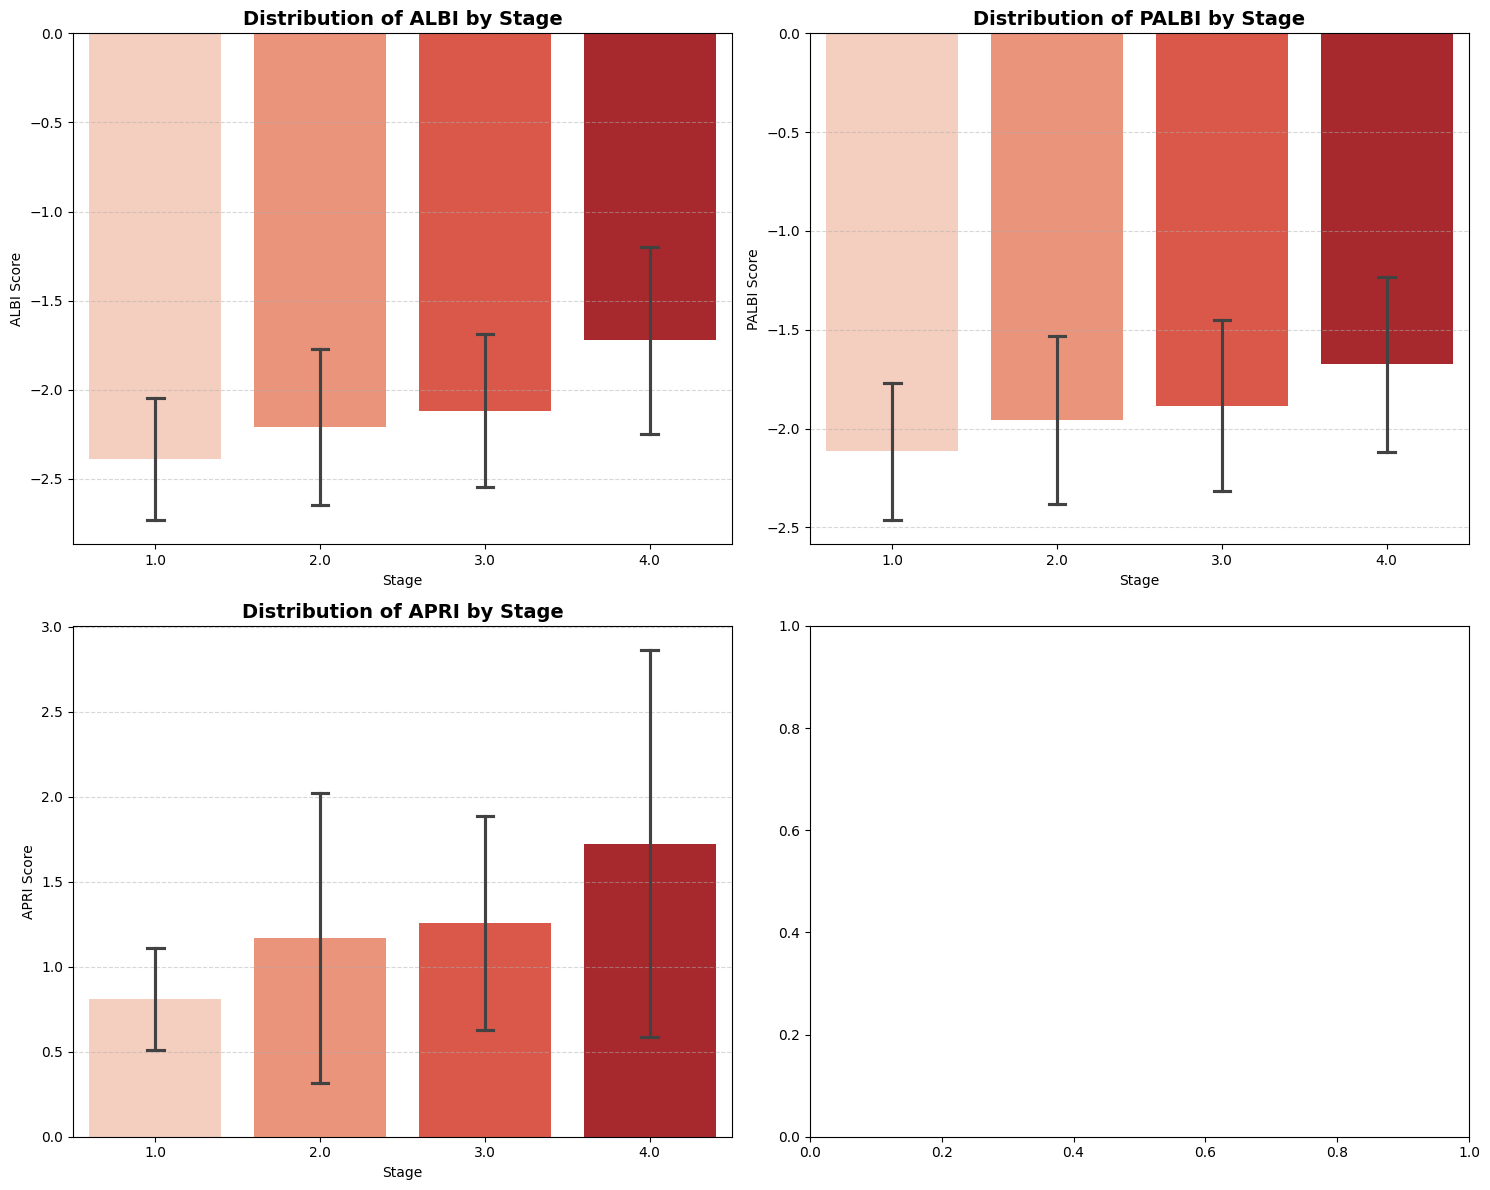

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------------------
# 1. 중간 계산용 변수 삭제 (Clean-up)
# ---------------------------------------------------------
# 삭제할 컬럼 목록 (계산을 위해 잠시 만든 것들)
cols_to_remove = [ "bili_umolL", "alb_gL", "plt_1000uL"]

# 오류 방지(errors='ignore')를 넣어 혹시 컬럼이 없어도 에러가 안 나게 처리
final_df = score_df.drop(columns=cols_to_remove, errors='ignore')

# ---------------------------------------------------------
# 2. Stage별 평균(Mean)과 표준편차(Std) 계산
# ---------------------------------------------------------
# 분석할 주요 스코어 리스트
target_scores = [ "ALBI", "PALBI", "APRI"]

# groupby를 이용해 Stage별 통계량 한 번에 뽑기
stats_df = final_df.groupby("Stage")[target_scores].agg(["mean", "std"])

print("📊 Stage별 Risk Score 통계 (Mean ± Std):")
display(stats_df)

# ---------------------------------------------------------
# 3. 시각화 (Bar Plot with Error Bars)
# ---------------------------------------------------------
# 그래프 설정
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten() # 2x2 배열을 1줄로 펴서 for문 돌리기 편하게 함

# 색상 팔레트 설정 (Stage가 심해질수록 진한 색)
palette = sns.color_palette("Reds", n_colors=len(final_df["Stage"].unique()))

for i, col in enumerate(target_scores):
    ax = axes[i]
    
    # 막대 그래프 (평균) 그리기 + 오차 막대 (표준편차, ci='sd')
    sns.barplot(
        data=final_df, 
        x="Stage", 
        y=col, 
        ax=ax, 
        palette=palette, 
        errorbar='sd',  # 표준편차를 에러바로 표시 (ci=95 대신 sd 사용)
        capsize=0.1     # 에러바 머리 크기
    )
    
    ax.set_title(f"Distribution of {col} by Stage", fontsize=14, fontweight='bold')
    ax.set_ylabel(f"{col} Score")
    ax.set_xlabel("Stage")
    ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

📊 [신규 변수] Stage별 평균 및 표준편차:


bili_x_albumin      pt_x_bili       portal_hint      chol_over_alp     
                mean  std      mean   std        mean  std          mean  std
Stage                                                                        
1.00            0.25 0.12      9.50  4.44        0.00 0.00          0.29 0.11
2.00            0.46 0.41     16.75 14.36        0.00 0.00          0.28 0.12
3.00            0.61 0.54     22.40 19.95        0.00 0.00          0.27 0.13
4.00            1.31 1.36     46.45 46.10        0.00 0.00          0.24 0.11

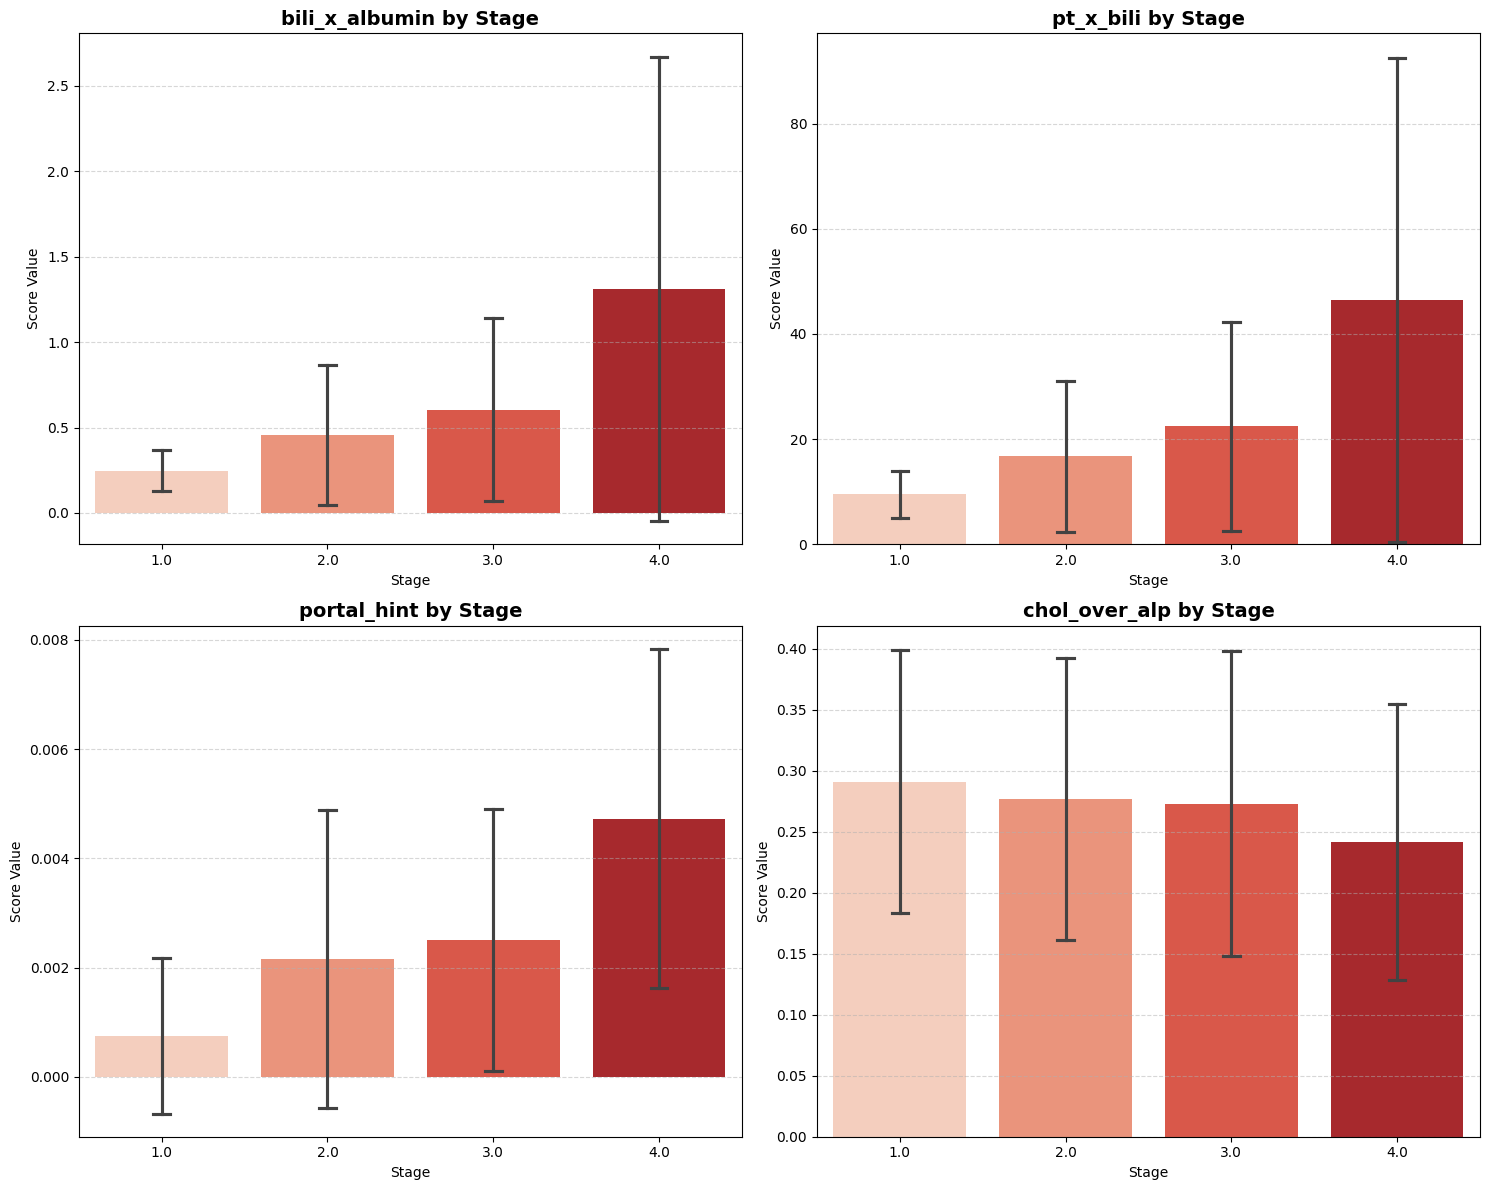

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 분모 0 방지용 엡실론
eps = 1e-6

# ---------------------------------------------------------
# 1. 파생 변수 생성 (Feature Engineering)
# ---------------------------------------------------------

# (1) bili_x_albumin: (Bilirubin ↑) / (Albumin ↓)
# 알부민이 낮고 빌리루빈이 높을수록(간부전) 값이 커짐
score_df["bili_x_albumin"] = score_df["Bilirubin"] / (score_df["Albumin"] + eps)

# (2) pt_x_bili: (Prothrombin ↑) * (Bilirubin ↑)
# 응고지연과 황달이 동시에 오면 값이 급격히 커짐
score_df["pt_x_bili"] = score_df["Prothrombin"] * score_df["Bilirubin"]

# (3) portal_hint: (1 / Platelets) * Hepatomegaly
# 설명: 혈소판이 낮을수록(1/Plt는 커짐) + 간비대(1)가 있을 때 값을 가짐
# 이미 Hepatomegaly가 0, 1로 되어있다고 가정하고 바로 곱합니다.
score_df["portal_hint"] = (1.0 / (score_df["Platelets"] + eps)) * score_df["Hepatomegaly"]

# (4) chol_over_alp: 콜레스테롤 / 알칼리성 인산분해효소
score_df["chol_over_alp"] = score_df["Cholesterol"] / (score_df["Alk_Phos"] + eps)

# ---------------------------------------------------------
# 2. 통계량 확인 (Mean ± Std)
# ---------------------------------------------------------
new_features = ["bili_x_albumin", "pt_x_bili", "portal_hint", "chol_over_alp"]

stats_df = score_df.groupby("Stage")[new_features].agg(["mean", "std"])
print("📊 [신규 변수] Stage별 평균 및 표준편차:")
display(stats_df)

# ---------------------------------------------------------
# 3. 시각화 (Bar Plot with Error Bars)
# ---------------------------------------------------------
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

# 색상 팔레트 (Stage가 심각할수록 진하게)
palette = sns.color_palette("Reds", n_colors=len(score_df["Stage"].unique()))

for i, col in enumerate(new_features):
    ax = axes[i]
    
    # 막대(평균) + 에러바(표준편차)
    sns.barplot(
        data=score_df, 
        x="Stage", 
        y=col, 
        ax=ax, 
        palette=palette, 
        errorbar='sd',  # 표준편차 표시
        capsize=0.1
    )
    
    ax.set_title(f"{col} by Stage", fontsize=14, fontweight='bold')
    ax.set_ylabel("Score Value")
    ax.set_xlabel("Stage")
    ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [74]:
X=score_df.drop(['Stage','Drug','N_Days','Status','Age'],axis=1)
y=score_df[["Stage"]]

In [75]:
X.describe()

,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,...,bili_umolL,alb_gL,plt_1000uL,ALBI,PALBI,APRI,bili_x_albumin,pt_x_bili,portal_hint,chol_over_alp
count,418.00,418.00,418.00,418.00,418.00,418.00,418.00,418.00,418.00,418.00,...,418.00,418.00,418.00,418.00,418.00,418.00,418.00,418.00,418.00,418.00
mean,0.11,0.06,0.64,0.22,0.20,2.61,320.68,3.50,82.27,1406.07,...,44.61,35.00,255.88,-2.02,-1.84,1.38,0.80,28.79,0.00,0.26
std,0.31,0.23,0.48,0.41,0.51,2.82,81.32,0.41,49.04,614.12,...,48.31,4.15,93.82,0.51,0.45,0.91,0.96,33.19,0.00,0.12
min,0.00,0.00,0.00,0.00,0.00,0.30,132.00,2.31,4.00,289.00,...,5.13,23.10,62.00,-3.28,-2.80,0.14,0.07,2.97,0.00,0.06
25%,0.00,0.00,0.00,0.00,0.00,0.80,273.00,3.24,51.25,1016.25,...,13.68,32.43,190.00,-2.39,-2.17,0.83,0.22,8.12,0.00,0.20
50%,0.00,0.00,1.00,0.00,0.00,1.40,309.50,3.53,73.00,1259.00,...,23.95,35.30,251.00,-2.08,-1.89,1.13,0.39,14.49,0.00,0.25
75%,0.00,0.00,1.00,0.00,0.00,3.40,347.75,3.77,100.75,1707.75,...,58.15,37.70,315.50,-1.71,-1.54,1.70,1.01,37.09,0.00,0.30
max,1.00,1.00,1.00,1.00,2.00,12.64,528.00,4.64,235.12,2907.75,...,216.15,46.40,500.25,-0.42,-0.42,8.82,5.47,167.92,0.01,1.18


In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y  
)

print(f"X_Train set: {X_train.shape}")
print(f"X_Test set: {X_test.shape}")
print(f"y_Train set: {y_train.shape}")
print(f"y_Test set: {y_test.shape}")

X_Train set: (292, 24)
X_Test set: (126, 24)
y_Train set: (292, 1)
y_Test set: (126, 1)


### Gridsearch & Cross validation


🔥 모델별 교차 검증(Cross Validation) 진행 중...
Model                | Mean CV Score   | Std Dev (안정성)
------------------------------------------------------------
Logistic Regression  | 0.5278          | ±0.0596
Random Forest        | 0.5581          | ±0.0519
LightGBM             | 0.5649          | ±0.0423
XGBoost              | 0.5959          | ±0.0441
🏆 최종 1등 모델: XGBoost (평균 정확도: 0.5959)


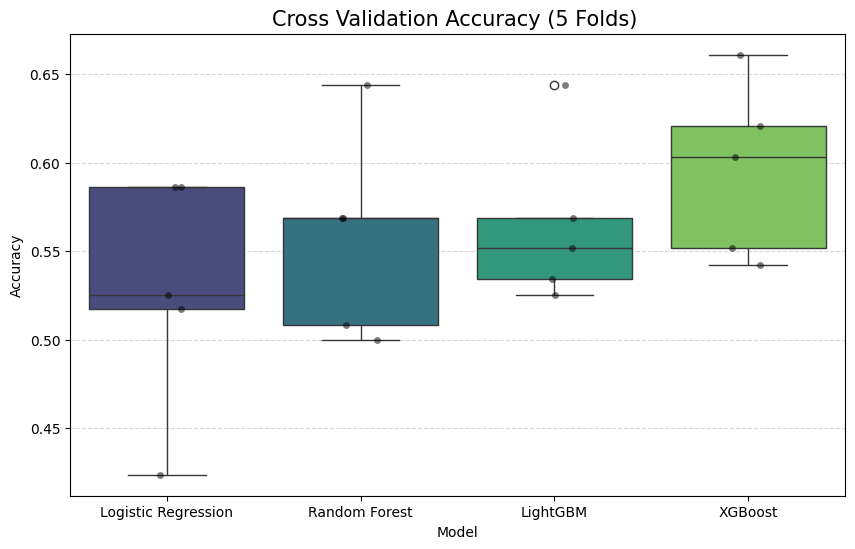


🔍 [XGBoost] 최종 테스트셋(Test Set) 상세 보고서:
              precision    recall  f1-score   support

           0       0.33      0.17      0.22         6
           1       0.70      0.57      0.63        28
           2       0.62      0.76      0.68        49
           3       0.72      0.67      0.70        43

    accuracy                           0.66       126
   macro avg       0.59      0.54      0.56       126
weighted avg       0.66      0.66      0.65       126


📊 [XGBoost] SHAP 분석 시작...


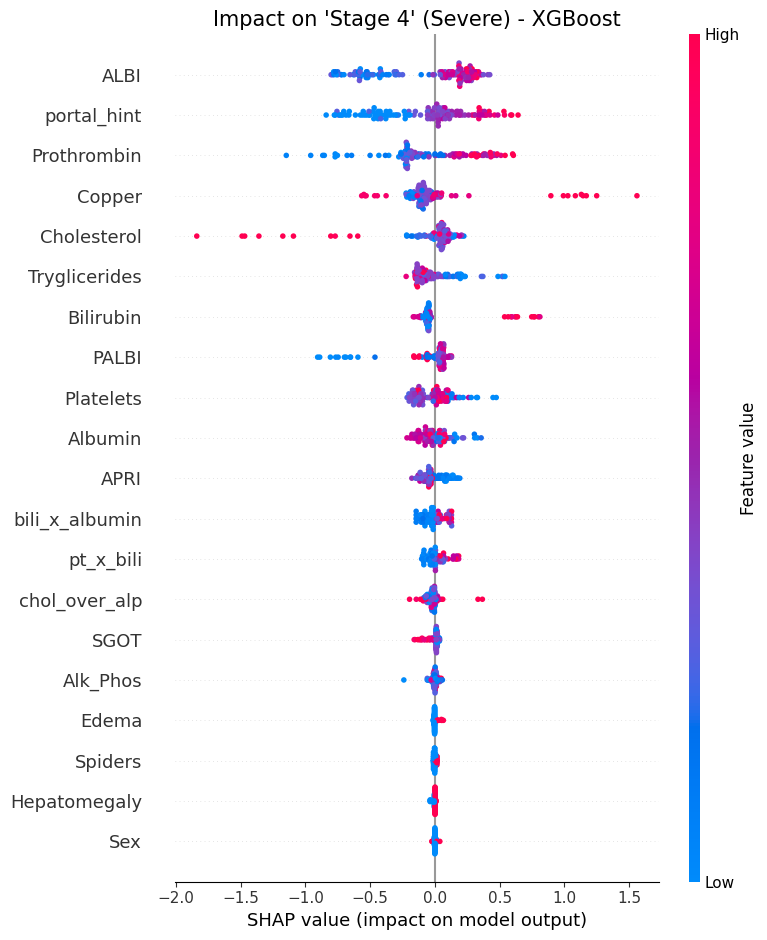

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# 경고 무시
warnings.filterwarnings('ignore')

# 모델 및 유틸리티
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
import shap


# ---------------------------------------------------------
# 1. 라벨(y) 0부터 시작하도록 조정 (안전장치)
# ---------------------------------------------------------
if np.min(y_train.values) == 1:
    y_train = y_train.astype(int) - 1
    y_test = y_test.astype(int) - 1

# ---------------------------------------------------------
# 2. 하이퍼파라미터 그리드 (탐색 범위)
# ---------------------------------------------------------
param_grids = {
    "Logistic Regression": {
        'model': LogisticRegression(random_state=42, max_iter=3000),
        'params': {'C': [0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']}
    },
    "Random Forest": {
        'model': RandomForestClassifier(random_state=42),
        'params': {'n_estimators': [100, 200], 'max_depth': [5, 10, None], 'min_samples_leaf': [1, 2]}
    },
    "LightGBM": {
            'model': LGBMClassifier(random_state=42, verbose=-1), # verbose=-1: 불필요한 경고 끄기
            'params': {
                'n_estimators': [100, 200], 
                'learning_rate': [0.05, 0.1], 
                'max_depth': [3, 5, 10]
            }
        },
    "XGBoost": {
        'model': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
        'params': {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5]}
    }
}

# ---------------------------------------------------------
# 3. GridSearch & Cross Validation 상세 분석
# ---------------------------------------------------------
results_list = []      # 그래프 그리기용 데이터 저장소
best_models = {}       # 튜닝된 최적 모델 저장소
final_best_score = 0
final_best_name = ""

print("\n🔥 모델별 교차 검증(Cross Validation) 진행 중...")
print("="*60)
print(f"{'Model':<20} | {'Mean CV Score':<15} | {'Std Dev (안정성)'}")
print("-" * 60)

# 5-Fold 설정 (Stratified: 라벨 비율 유지)
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, config in param_grids.items():
    # 1) 그리드 서치로 '최적 파라미터' 찾기
    grid = GridSearchCV(config['model'], config['params'], cv=cv_strategy, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    
    # 2) 찾은 최적 모델 저장
    best_model = grid.best_estimator_
    best_models[name] = best_model
    
    # 3) [핵심] 최적 모델로 다시 CV를 돌려서 '5번의 점수'를 모두 확보
    # 이렇게 해야 그래프를 그릴 수 있습니다.
    cv_scores = cross_val_score(best_model, X_train, y_train, cv=cv_strategy, scoring='accuracy')
    
    # 결과 출력
    mean_score = cv_scores.mean()
    std_score = cv_scores.std()
    print(f"{name:<20} | {mean_score:.4f}          | ±{std_score:.4f}")
    
    # 그래프용 데이터 저장
    for score in cv_scores:
        results_list.append({'Model': name, 'CV Accuracy': score})
        
    # 챔피언 모델 갱신
    if mean_score > final_best_score:
        final_best_score = mean_score
        final_best_name = name

print("="*60)
print(f"🏆 최종 1등 모델: {final_best_name} (평균 정확도: {final_best_score:.4f})")

# ---------------------------------------------------------
# 4. 교차 검증 결과 시각화 (Box Plot)
# ---------------------------------------------------------
results_df = pd.DataFrame(results_list)

plt.figure(figsize=(10, 6))
# 박스 플롯: 점수 분포와 안정성을 보여줌
sns.boxplot(data=results_df, x='Model', y='CV Accuracy', palette='viridis')
# 스트립 플롯: 실제 점수 하나하나를 점으로 찍어줌
sns.stripplot(data=results_df, x='Model', y='CV Accuracy', color='black', alpha=0.5, jitter=True)

plt.title(f'Cross Validation Accuracy (5 Folds) ', fontsize=15)
plt.ylabel('Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# ---------------------------------------------------------
# 5. 최종 모델 테스트셋 평가
# ---------------------------------------------------------
print(f"\n🔍 [{final_best_name}] 최종 테스트셋(Test Set) 상세 보고서:")
final_model = best_models[final_best_name]
final_pred = final_model.predict(X_test)
print(classification_report(y_test, final_pred))

# ---------------------------------------------------------
# 6. SHAP 분석
# ---------------------------------------------------------
print(f"\n📊 [{final_best_name}] SHAP 분석 시작...")

if final_best_name in ["Random Forest", "XGBoost"]:
    explainer = shap.TreeExplainer(final_model)
    shap_values = explainer.shap_values(X_test)
else:
    # SVM, LR용 (속도 최적화)
    background = shap.kmeans(X_train, 10)
    explainer = shap.KernelExplainer(final_model.predict_proba, background)
    shap_values = explainer.shap_values(X_test)

# Stage 4 영향력 분석
target_idx = 3
if isinstance(shap_values, list):
    values_to_plot = shap_values[target_idx] if len(shap_values) > target_idx else shap_values
elif hasattr(shap_values, 'shape') and len(shap_values.shape) == 3:
    values_to_plot = shap_values[:, :, target_idx]
else:
    values_to_plot = shap_values

plt.figure()
plt.title(f"Impact on 'Stage 4' (Severe) - {final_best_name}", fontsize=15)
shap.summary_plot(values_to_plot, X_test, show=False)
plt.show()

### Gridsearch & Cross validation + SMOTE


🔥 [SMOTE 데이터] 모델별 튜닝 및 교차 검증 진행 중...
Model                | Mean CV Score   | Std Dev
------------------------------------------------------------
Logistic Regression  | 0.4730          | ±0.0606
Random Forest        | 0.5411          | ±0.0776
LightGBM             | 0.5479          | ±0.0411
XGBoost              | 0.5687          | ±0.0411
🏆 최종 1등 모델: XGBoost (CV Score: 0.5687)


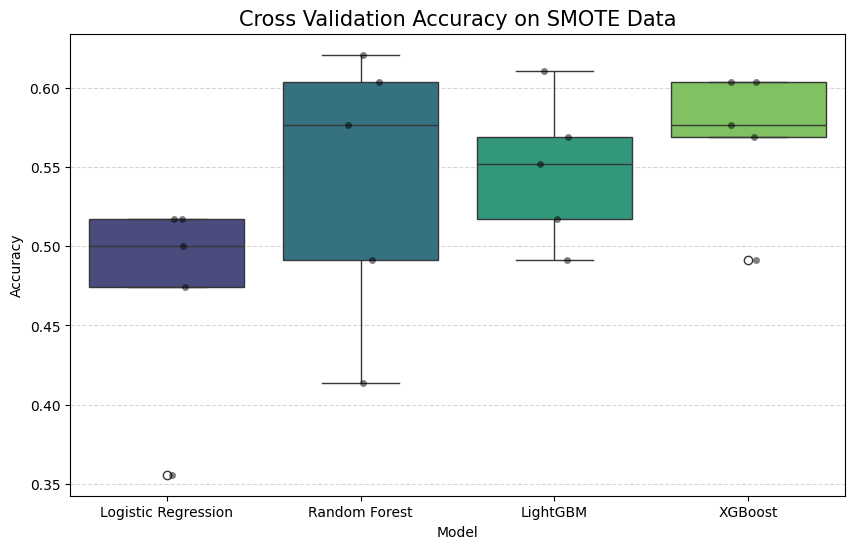


🔍 [XGBoost] 최종 테스트셋(Real World Data) 상세 보고서:
              precision    recall  f1-score   support

           0       0.08      0.33      0.13         6
           1       0.57      0.61      0.59        28
           2       0.64      0.47      0.54        49
           3       0.72      0.60      0.66        43

    accuracy                           0.54       126
   macro avg       0.50      0.50      0.48       126
weighted avg       0.62      0.54      0.57       126


📊 [XGBoost] SHAP 분석 시작...


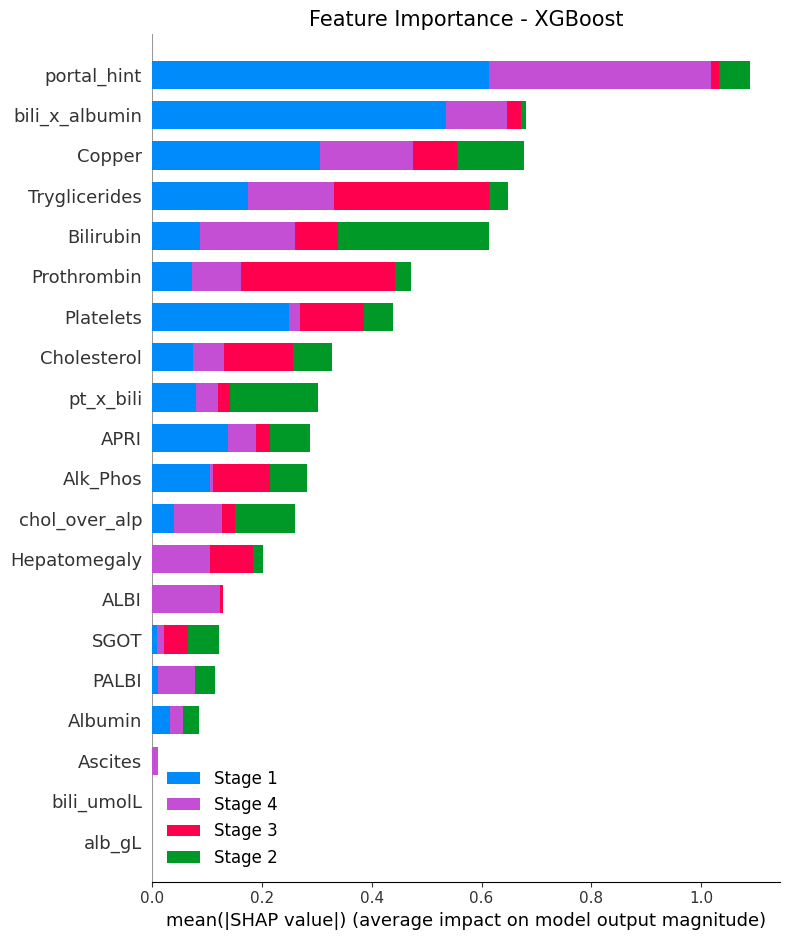

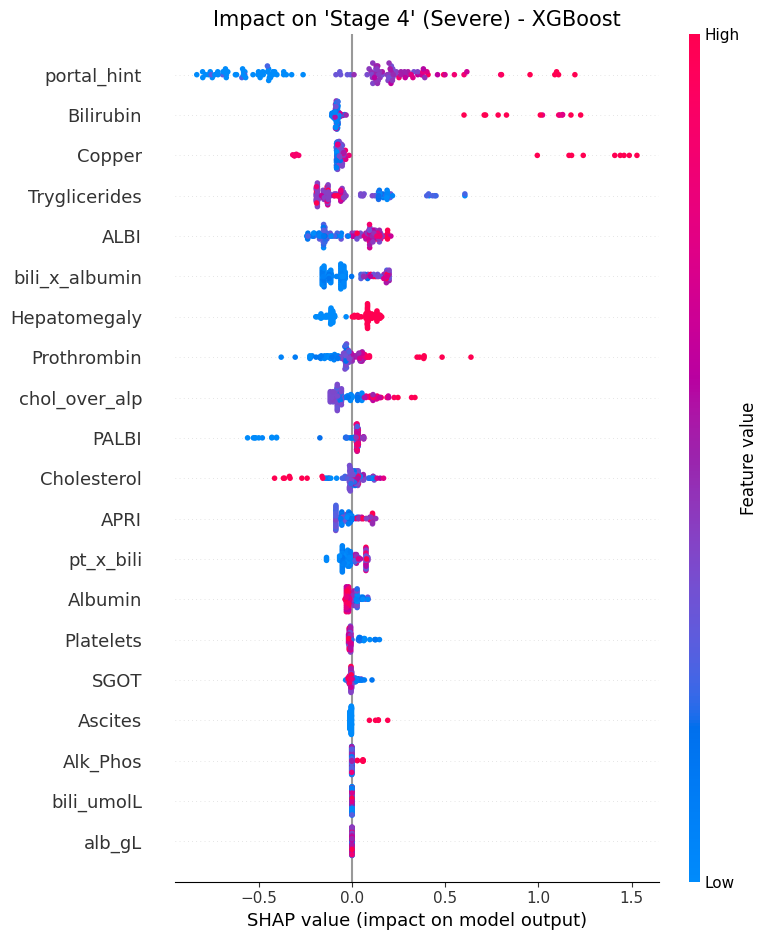

In [79]:
# 일반 pipeline이 아니라 imblearn 전용 pipeline이어야 합니다.
from imblearn.pipeline import Pipeline as ImbPipeline

# if np.min(y_train) == 1:
#     print("✅ 라벨을 0~3 범위로 조정합니다 (1씩 차감).")
#     y_train = y_train.astype(int) - 1
#     y_test = y_test.astype(int) - 1
# else:
#     print("✅ 라벨이 이미 0부터 시작하거나 조정되어 있습니다.")

# ---------------------------------------------------------
# 2. 하이퍼파라미터 그리드 (SMOTE 데이터용)
# ---------------------------------------------------------
param_grids = {
    "Logistic Regression": {
        'model': ImbPipeline([
            ('smote', SMOTE(random_state=42)), 
            ('classifier', LogisticRegression(random_state=42, max_iter=3000))
        ]),
        'params': {
            'classifier__C': [0.1, 1, 10], 
            'classifier__solver': ['lbfgs', 'liblinear']
        }
    },
    "Random Forest": {
        'model': ImbPipeline([
            ('smote', SMOTE(random_state=42)), 
            ('classifier', RandomForestClassifier(random_state=42))
        ]),
        'params': {
            'classifier__n_estimators': [100, 200], 
            'classifier__max_depth': [5, 10, None],
            'classifier__min_samples_leaf': [1, 2]
        }
    },
    "LightGBM": {
        'model': ImbPipeline([
            ('smote', SMOTE(random_state=42)), 
            ('classifier', LGBMClassifier(random_state=42, verbose=-1))
        ]),
        'params': {
            'classifier__n_estimators': [100, 200], 
            'classifier__learning_rate': [0.05, 0.1], 
            'classifier__max_depth': [3, 5, 10]
        }
    },
    "XGBoost": {
        'model': ImbPipeline([
            ('smote', SMOTE(random_state=42)), 
            ('classifier', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'))
        ]),
        'params': {
            'classifier__n_estimators': [100, 200], 
            'classifier__learning_rate': [0.05, 0.1], 
            'classifier__max_depth': [3, 5]
        }
    }
}

# ---------------------------------------------------------
# 3. GridSearch & Cross Validation (Training Data: X_train_res)
# ---------------------------------------------------------
results_list = []      
best_models = {}       
final_best_score = 0
final_best_name = ""

print("\n🔥 [SMOTE 데이터] 모델별 튜닝 및 교차 검증 진행 중...")
print("="*60)
print(f"{'Model':<20} | {'Mean CV Score':<15} | {'Std Dev'}")
print("-" * 60)

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, config in param_grids.items():
    try:
        # 1) Grid Search (증강 데이터로 학습)
        grid = GridSearchCV(config['model'], config['params'], cv=cv_strategy, scoring='accuracy', n_jobs=-1)
        grid.fit(X_train, y_train)
        
        # 2) 최적 모델 저장
        best_model = grid.best_estimator_
        best_models[name] = best_model
        
        # 3) CV 점수 확인
        cv_scores = cross_val_score(best_model, X_train, y_train, cv=cv_strategy, scoring='accuracy')
        
        mean_score = cv_scores.mean()
        std_score = cv_scores.std()
        print(f"{name:<20} | {mean_score:.4f}          | ±{std_score:.4f}")
        
        for score in cv_scores:
            results_list.append({'Model': name, 'CV Accuracy': score})
            
        if mean_score > final_best_score:
            final_best_score = mean_score
            final_best_name = name
            
    except Exception as e:
        print(f"{name:<20} | Error: {e}")

print("="*60)
print(f"🏆 최종 1등 모델: {final_best_name} (CV Score: {final_best_score:.4f})")

# ---------------------------------------------------------
# 4. 교차 검증 결과 시각화
# ---------------------------------------------------------
results_df = pd.DataFrame(results_list)

plt.figure(figsize=(10, 6))
sns.boxplot(data=results_df, x='Model', y='CV Accuracy', palette='viridis')
sns.stripplot(data=results_df, x='Model', y='CV Accuracy', color='black', alpha=0.5, jitter=True)
plt.title('Cross Validation Accuracy on SMOTE Data', fontsize=15)
plt.ylabel('Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# ---------------------------------------------------------
# 5. [중요] 원본 테스트셋(Test Set) 최종 평가
# ---------------------------------------------------------
print(f"\n🔍 [{final_best_name}] 최종 테스트셋(Real World Data) 상세 보고서:")
final_model = best_models[final_best_name]
final_pred = final_model.predict(X_test)
print(classification_report(y_test, final_pred))

# ---------------------------------------------------------
# 6. SHAP 분석 (Real Test Set 기준)
# ---------------------------------------------------------
print(f"\n📊 [{final_best_name}] SHAP 분석 시작...")
actual_model = final_model.named_steps['classifier']

if final_best_name in ["Random Forest", "XGBoost", "LightGBM"]:
    # Tree 계열 모델
    if final_best_name == "XGBoost":
        # XGBoost는 가끔 get_booster()를 명시해야 에러가 안 납니다.
        explainer = shap.TreeExplainer(actual_model.get_booster())
    else:
        explainer = shap.TreeExplainer(actual_model)
        # 여기서 X_test를 넣어서 다시 구합니다!
    shap_values = explainer.shap_values(X_test)
else:
    # SVM, LR (속도 위해 샘플링 사용)
    X_train_summary = shap.kmeans(X_train_res, 50) 
    explainer = shap.KernelExplainer(final_model.predict_proba, X_train_summary)
    shap_values = explainer.shap_values(X_test)

# (1) 전체 변수 중요도
plt.figure()
plt.title(f"Feature Importance - {final_best_name}", fontsize=15)
shap.summary_plot(shap_values, X_test, plot_type="bar", 
                  class_names=['Stage 1', 'Stage 2', 'Stage 3', 'Stage 4'], show=False)
plt.show()

# (2) Stage 4 영향력 분석 (자동 형태 감지)
target_class_idx = 3

if isinstance(shap_values, list):
    if len(shap_values) > target_class_idx:
        values_to_plot = shap_values[target_class_idx]
    else:
        values_to_plot = shap_values
elif hasattr(shap_values, 'shape') and len(shap_values.shape) == 3:
    values_to_plot = shap_values[:, :, target_class_idx]
else:
    values_to_plot = shap_values

plt.figure()
plt.title(f"Impact on 'Stage 4' (Severe) - {final_best_name}", fontsize=15)
shap.summary_plot(values_to_plot, X_test, show=False)
plt.show()